<span class="badge badge-info">ВЫПУСКНОЙ ПРОЕКТ</span>
# «E-commerce — Анализ товарного ассортимента»

## Описание проекта

Для интернет-магазина товаров для дома «Пока все ещё тут», необходимо **выявить профили покупателей, а также сделать полноценный анализ товарного ассортимента**. Поможем магазину стать лучше, а клиентам — обустроить дом своей мечты.

**Цели проекта**: проанализировать ассортимент товаров:
 - проведите исследовательский анализ данных;
 - проанализируйте торговый ассортимент;
 - сформулируйте и проверьте статистические гипотезы.

## Описание данных

**Таблица `ecommerce` (датасет описывает транзакции интернет-магазина товаров для дома и быта)**

 - date — дата заказа;
 - customer_id — идентификатор покупателя;
 - order_id — идентификатор заказа;
 - product — наименование товара;
 - quantity — количество товара в заказе;
 - price — цена товара.

## Инструкция по выполнению проекта

## Шаг 1. Загрузка, первичный осмотр и предобработка данных

 - 1.1. Импорт библиотек и загрузка данных.
 - 1.2. Осмотр данных.
 - 1.3. Предобработка данных.
 - 1.4. Обработка выбросов.
 - 1.5. Добавление нужных столбцов.
 - 1.6. Выводы о данных.

## Шаг 2. Исследовательский анализ данных

 - 2.1. Посмотрим на данные, за какой период мы располагаем. Поищем аномалии в датах заказов. 
 - 2.2. Посмотрим на активность покупателей, а также построим графики изменения метрик во времени. Поищем аномальных покупателей с аномальным кол-во заказов. 
 - 2.3. Посчитаем сколько заказов сделали клиенты интернет-магазина, и построим графики по изменению кол-во заказов во времени.
 - 2.4. Посмотрим на выручку c заказов. Какие товары интернет-магазина приносят наибольшую прибыль. Как меняется эта метрика с течением времени. Найдем бестселлеры за весь период.  
 - 2.5. Построим матрицу корреляций.

## Шаг 3. Категоризация наименования товара

 - 3.1. Лемматизация.
 - 3.2. Категоризация наименования товара.

## Шаг 4. Анализ товарного ассортимента

 - 4.1. Топ-5 самых продаваемых товаров в каждой категории по кол-ву заказов за весь период.
 - 4.2. Топ-5 самых прибыльных товаров в каждой категории за весь период.
 - 4.3. Посчитаем выручку и количество покупателей по категориям.
 - 4.4. Поищем сезонность товаров по категориям. Проанализируем продажи по категориям по временам года. 

## Шаг 5. Сегментация покупателей на основе истории их покупок

 - 5.1. Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисем дендрограмму.
 - 5.2. Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем сегменты покупателей.
 - 5.3. Посмотрим на статистику по сегментам покупателей.

## Шаг 6. Проверка статистических гипотез

 - 6.1. Посчитаем статистическую значимость различий в среднем чеке заказа между сегментами покупателей. 
 - 6.2. Посчитаем статистическую значимость различий в среднем объёме продаж между сегментами покупателей.
 - 6.3. Проверим одинаковые средние объёмы продаж в будни и выходные или нет.

## Шаг 7. Общие выводы и рекомендации

## Шаг 8. Презентация и дашборд

-----

## Шаг 1. Загрузка, первичный осмотр и предобработка данных

### 1.1. Импорт библиотек и загрузка данных

In [1]:
# Необходимые библиотеки для исследования.
import pandas as pd                                         
import numpy as np                                          
import math as mth                                         

import seaborn as sns                                     
import matplotlib.pyplot as plt                           
import plotly.express as px                                
%matplotlib inline

from datetime import datetime                                     
import requests                                             
import re                                                   

from pymystem3 import Mystem                                
from collections import Counter                            

import scipy.stats as stats
from scipy import stats as st                                

from sklearn.preprocessing import StandardScaler            
from sklearn.cluster import KMeans                          
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage     

import warnings                                             
warnings.filterwarnings('ignore')                           

C:\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
C:\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
# Загрузка данных
custom_date_parser = lambda x: datetime.strptime(x, '%Y%m%d%H')

ecommerce = pd.read_csv(
                        'ecommerce_dataset.csv',\
                         parse_dates=['date'],
                         date_parser=custom_date_parser
                        )
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         6737 non-null   datetime64[ns]
 1   customer_id  6737 non-null   object        
 2   order_id     6737 non-null   int64         
 3   product      6737 non-null   object        
 4   quantity     6737 non-null   int64         
 5   price        6737 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 315.9+ KB


In [3]:
# настройка вывода
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_colwidth', -1)                   
pd.set_option('display.float_format', '{:.2f}'.format)

In [4]:
# Установка эстетических параметров графиков.
sns.set(context='poster', style='white', palette='hls', font='sans-serif', font_scale=1, color_codes=True, rc=None)

### 1.2. Осмотр данных

In [5]:
# получение 5 случайно выбранных записей
ecommerce.sample(5, random_state=13) 

,date,customer_id,order_id,product,quantity,price
4859,2019-06-07 22:00:00,db77c238-3c80-4032-9e3c-c30a43f4a650,14835,Портулак рассада однолетних цветов в кассете по 10 шт,1,210.00
5555,2019-06-24 09:00:00,9897ccd6-9441-4886-b709-b06361fabf6c,14873,"Петуния Potunia Plus Strawberry Ice красно-розовая с прожилками объем 0,5 л",1,90.00
3760,2019-05-14 11:00:00,daef5362-af6c-4a0e-b838-831dc927475d,14770,"Рассада Огурца сорт Герман, кассета по 6шт",1,120.00
1212,2018-12-15 14:00:00,b9caeee7-1425-4658-8de2-a361c1933336,69374,"Сушилка для белья потолочная Лиана 1,5 м 1703004",1,524.00
5954,2019-07-25 14:00:00,3a7ddab1-066e-4cd9-909a-1d31900b396a,14908,Пеларгония зональная махровая лососевая,2,169.00


In [6]:
# описательные статистики
ecommerce.describe().T 

,count,mean,std,min,25%,50%,75%,max
order_id,6737.00,43128.95,27899.41,12624.00,14827.00,68503.00,70504.00,73164.00
quantity,6737.00,2.50,15.27,1.00,1.00,1.00,1.00,1000.00
price,6737.00,462.03,871.30,9.00,101.00,135.00,398.00,14917.00


In [7]:
# проверка на отсутствующие значения
def print_useful_rows_info(df):
    print('Количество полностью заполненных объектов из всей выборки:', len(df.dropna()))
    print('Процент полностью заполненных объектов из всей выборки:', round(len(df.dropna()) / len(df) * 100, 2))
    
print_useful_rows_info(ecommerce)

Количество полностью заполненных объектов из всей выборки: 6737
Процент полностью заполненных объектов из всей выборки: 100.0


In [8]:
# проверка на наличие дубликатов
ecommerce.duplicated().sum() 

0

### Выводы

 - варьируется регистр букв в столбце с наименованием товара, что может вызвать неверную интерпритацию;
 - возможно, присутствуют дубликаты в столбце с наименованием товара и идентификатором заказа;
 - аномалии или выбросы в количестве товара, их стандартное отклонение сильно превышает среднее значение.

### 1.3. Предобработка данных

#### Рассмотрим значения в столбце `product и order_id`.

In [9]:
# форматирование product
ecommerce['product'] = ecommerce['product'].str.lower() 
ecommerce['product'] = ecommerce['product'].str.replace('ё','е', regex=True) 
ecommerce['product'] = ecommerce['product'].str.replace('(', '', regex=True) 
ecommerce['product'] = ecommerce['product'].str.replace(')', '', regex=True) 
ecommerce['product'] = ecommerce['product'].str.replace(',', '', regex=True) 

In [10]:
# проверка на отсутствие дубликатов
print(f'Количество полных дубликатов: {ecommerce.duplicated().sum()} строк')
print(f'Количество частичных дубликатов: {len(ecommerce[ecommerce[["product", "customer_id", "order_id"]].duplicated() == True])} строк')
print(f'Доля дубликатов от общего количества записей: {round(len(ecommerce[ecommerce[["product", "customer_id", "order_id"]].duplicated() == True]) / len(ecommerce), 2)}')

Количество полных дубликатов: 0 строк
Количество частичных дубликатов: 1886 строк
Доля дубликатов от общего количества записей: 0.28


Наблюдения: доля дубликатов от общего количества записей составляет 28%, смотрим:

In [11]:
ecommerce[ecommerce[["product", "customer_id", "order_id"]].duplicated() == True].head()

,date,customer_id,order_id,product,quantity,price
58,2018-10-02 18:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,доска гладильная eurogold professional 130х48 см металлическая сетка 35748w,1,3299.00
59,2018-10-02 19:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,доска гладильная eurogold professional 130х48 см металлическая сетка 35748w,1,3299.00
60,2018-10-02 20:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,доска гладильная eurogold professional 130х48 см металлическая сетка 35748w,1,3299.00
63,2018-10-03 04:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,доска гладильная eurogold professional 130х48 см металлическая сетка 35748w,1,3299.00
94,2018-10-04 13:00:00,32de7df8-8d4f-4c84-a7b9-c41d00dd83ba,68522,эвкалипт гунни d-17 см h-60 см,1,1409.00


Частичные дубликаты обусловлены сменой товара до оплаты заказа, в связи с этим я оставлю только позиции товара с максимальным временем для заказа.

In [12]:
# определение максимального времени для заказа -> left join -> фильтр на выбор строк с max значением 
df_clean = pd.merge(ecommerce, pd.DataFrame(ecommerce.groupby(['customer_id', 'order_id']).date.max()),\
                    left_on=['customer_id', 'order_id'], right_index=True,\
                    how='left')
df_clean = df_clean[df_clean['date_x'] == df_clean['date_y']]
df_clean.drop('date_y', axis=1, inplace=True)

In [13]:
# размерность отношений, учитывающих только последную вариативность заказа
df_clean.shape

(4815, 6)

### 1.4. Обработка выбросов

#### Рассмотрим значения в столбце `quantity`.

In [14]:
# функция для вычисления границ 3 сигм
def calculate_outliers_3sigma(data):
    low = data.mean() - 3 * data.std()
    high = data.mean() + 3 * data.std()
    boundaries = (round(low), round(high))
    
    return boundaries

Границы для нормальных значений "quantity": (-50, 56)
Количество строк с аномальными значениями:23 строк
Доля аномальных значений от общего количества записей: 0.5%


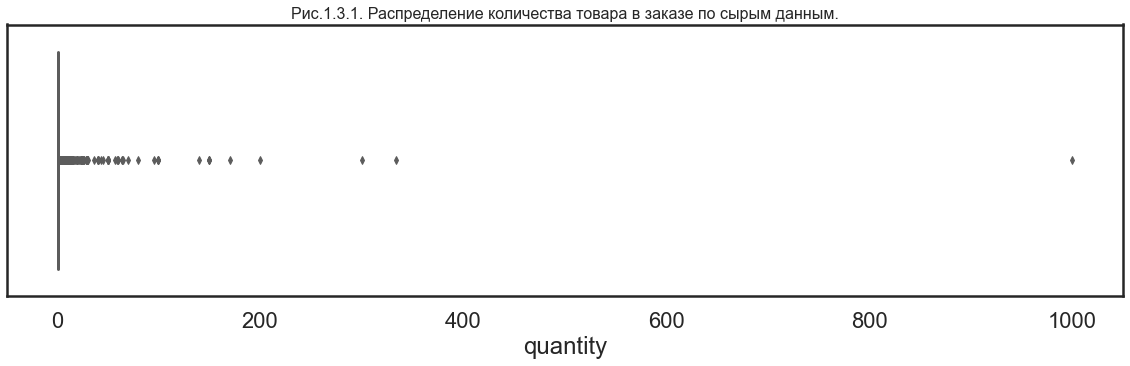

In [15]:
# Вывод границ нормальности на расстоянии 3 сигм
boundaries = calculate_outliers_3sigma(df_clean.quantity)
print(f'Границы для нормальных значений "quantity": {boundaries}')

# кол-во аномальных значений в столбце 'quantity'
is_outlier = (df_clean.quantity < boundaries[0]) | (df_clean.quantity > boundaries[1]) 
print(f'Количество строк с аномальными значениями:{is_outlier.sum()} строк')
print('Доля аномальных значений от общего количества записей: {:.1%}'.format(is_outlier.sum()/len(df_clean))) 

plt.figure(figsize=(20,5))
sns.boxplot(x='quantity', data=df_clean)
plt.title('Рис.1.3.1. Распределение количества товара в заказе по сырым данным.', fontsize=16)
plt.show()

In [16]:
# удалим из датасета аномальные значения 
df_clean = df_clean[(df_clean['quantity'] < boundaries[1])]

In [17]:
df_clean.describe().T # выведем статистику о датасете методом describe()

,count,mean,std,min,25%,50%,75%,max
order_id,4792.00,48217.06,27346.92,12624.00,14770.75,68864.00,70833.25,73164.00
quantity,4792.00,2.09,4.16,1.00,1.00,1.00,1.00,50.00
price,4792.00,518.73,949.13,9.00,90.00,150.00,509.00,14917.00


### 1.4. Feature engineering.

In [18]:
# Добавим столбец с выручкой c заказа.
df_clean['revenue'] = df_clean['quantity'] * df_clean['price']

In [19]:
# Выделим в отдельные столбцы время, день, неделю, месяц и год, а также полную дату.
df_clean['date'] = df_clean.date_x.dt.date
df_clean['year'] = df_clean.date_x.dt.year
df_clean['month'] = df_clean.date_x.dt.month
df_clean['week'] = df_clean.date_x.dt.week
df_clean['day'] = (df_clean.date_x.dt.dayofweek) + 1 
df_clean['hour'] = df_clean.date_x.dt.hour

In [20]:
# Cоздадим отдельные столбецы будни/выходные в зависимости от дня
df_clean['weekends'] = df_clean.day.apply(lambda x: 1 if x > 5 else 0)
df_clean.sample(5, random_state=13) 

,date_x,customer_id,order_id,product,quantity,price,revenue,date,year,month,week,day,hour,weekends
1092,2018-12-04 05:00:00,b0f1833c-0763-4f4e-b097-41d27a521e46,69194,кружка нордик 380мл прозрачная h8502 luminarc франция,30,58.00,1740.00,2018-12-04,2018,12,49,2,5,0
2640,2019-04-04 09:00:00,eeec96e6-88f0-4d11-a100-0b3971840412,14612,пеларгония розебудная margaretha укорененный черенок,3,135.00,405.00,2019-04-04,2019,4,14,4,9,0
5969,2019-07-27 10:00:00,25943c17-5df2-437b-80f8-2413ddf90172,72117,тележка багажная delta тбр-20 синий грузоподъемность 25 кг сумка и 50 кг каркас россия,1,734.00,734.00,2019-07-27,2019,7,30,6,10,1
961,2018-11-24 09:00:00,e72fcd9e-d3d0-4a40-8910-6bce6e794aed,69104,ящик почтовый металлический с ушками для навесного замка домик 1205251,1,172.00,172.00,2018-11-24,2018,11,47,6,9,1
1070,2018-12-03 11:00:00,2c8b9386-2e8c-4ee9-8aa4-2b4875b68578,14514,гвоздика турецкая роковая страсть 005 г 4660010773231,1,12.00,12.00,2018-12-03,2018,12,49,1,11,0


In [21]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4792 entries, 0 to 6736
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date_x       4792 non-null   datetime64[ns]
 1   customer_id  4792 non-null   object        
 2   order_id     4792 non-null   int64         
 3   product      4792 non-null   object        
 4   quantity     4792 non-null   int64         
 5   price        4792 non-null   float64       
 6   revenue      4792 non-null   float64       
 7   date         4792 non-null   object        
 8   year         4792 non-null   int64         
 9   month        4792 non-null   int64         
 10  week         4792 non-null   int64         
 11  day          4792 non-null   int64         
 12  hour         4792 non-null   int64         
 13  weekends     4792 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(8), object(3)
memory usage: 561.6+ KB


### 1.5. Выводы о данных.

 - **На этапе осмотра данных** были выявлены потенциально проблемные особенности в данных, такие как, вариативность регистра букв в  наименовании товара, выбросы в количестве и цене товара.
 - **На этапе предобработки данных** были приняты следующие решения: привели наименование товара к нижнему регистру, также заменили ё на е. На этом этапе, обнаружили неполные дубликаты в столбце с наименованием товара и идентификатором заказа. Так как, доля частичных дубликатов составляла 28% проведена работа над вариативностью заказов, в отношении оставлена только окончательная вариативность заказа.
 - **На этапе обработки выбросов**, удалили из датасета аномальные значения в кол-ве товара с помощью правила 3 сигм. 
 - Также, проведен этап **feature engineering** для дальнейшего исследования. 

## Шаг 2. Исследовательский анализ данных

### 2.1. Посмотрим на данные, за какой период мы располагаем. Поищем аномалии в датах заказов. 

In [22]:
# Найдем минимальную и максимальную дату.
print(f"Дата первой записи в логе: {df_clean.date_x.min()} ")
print(f"Дата последней записи в логе: {df_clean.date_x.max()} ")
print(f"Период ведения лога: {df_clean.date_x.max() - df_clean.date_x.min()} ")

Дата первой записи в логе: 2018-10-01 00:00:00 
Дата последней записи в логе: 2019-10-31 16:00:00 
Период ведения лога: 395 days 16:00:00 


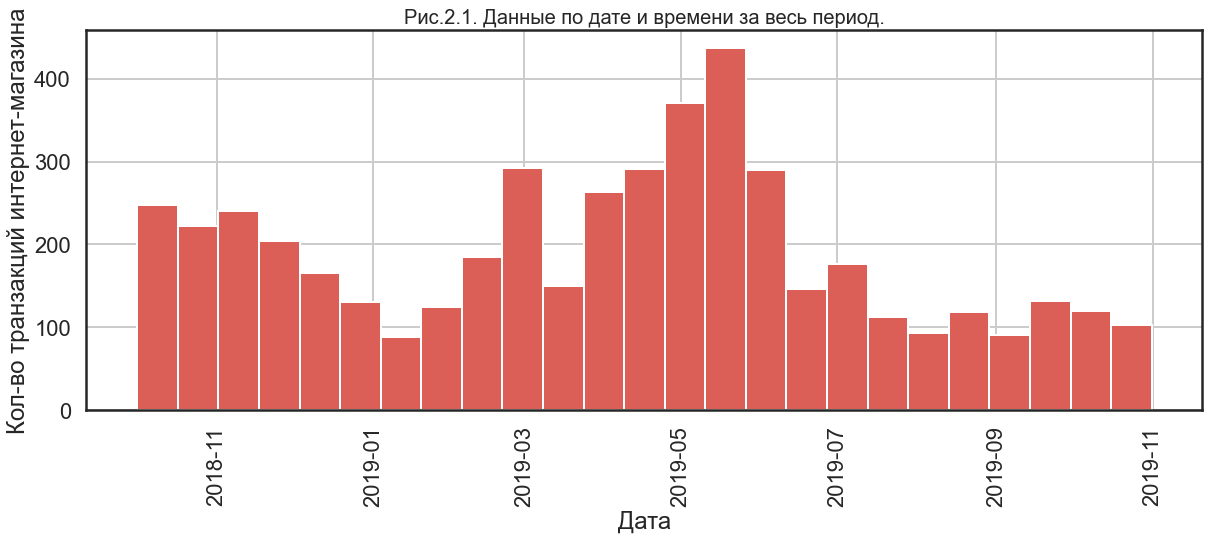

In [23]:
# Построим гистограмму по дате и времени.
plt.figure(figsize=(20,7)) 
plt.title('Рис.2.1. Данные по дате и времени за весь период.', fontsize=20)
df_clean.date_x.hist(bins=25, grid=True)
plt.xticks(rotation=90)
plt.xlabel('Дата')
plt.ylabel('Кол-во транзакций интернет-магазина')
plt.show()

#### Выводы

Представлены данные с 2018-10-01 по 2019-10-31, это 1 год и месяц. С апреля 2019 года виден рост по кол-ву покупок. Пик приходиться на июнь 2019 года. Наблюдается небольшая сезонность по продажам.

### 2.2. Посмотрим на активность покупателей, а также построим графики изменения метрик во времени. Поищем аномальных покупателей с аномальным кол-во заказов. 

Для начала поищем аномальных покупателей с аномальным количеством заказов, если такие найдутся, необходимо будет их удалить.  Затем посмотрим на активность покупателей в интернет магазине.

In [24]:
# Посчитаем общее кол-во покупателей.
customers_total = len(df_clean.customer_id.unique())
print("Всего покупателей за весь период: {} человек".format(customers_total))

Всего покупателей за весь период: 2432 человек


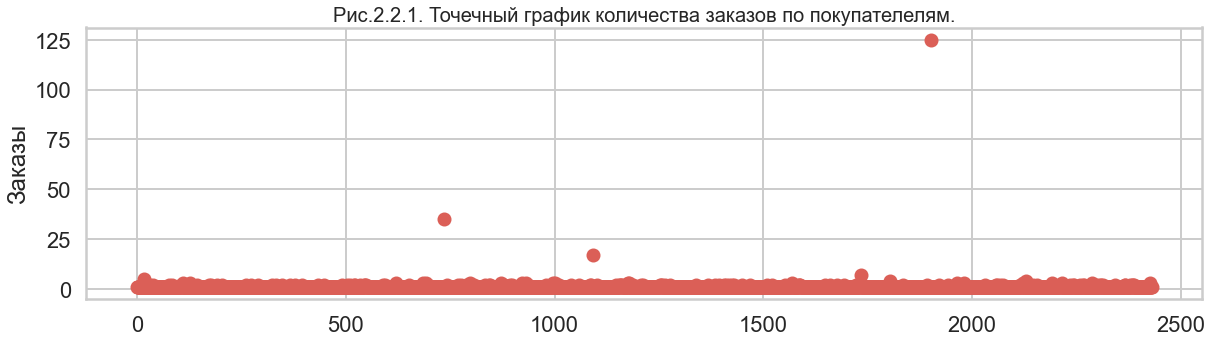

In [25]:
# Подсчитаем количество заказов по покупателелям и посмотрим на результат.
orders_per_customer = df_clean.groupby('customer_id', as_index=False).agg({'order_id':'nunique'})
orders_per_customer.columns = ['customer_id','orders']

# Построим точечный график количества заказов по пользователям.
# серия из чисел от 0 до количества наблюдений в orders_per_customer.
x_values = pd.Series(range(0,len(orders_per_customer)))

sns.set_style('whitegrid')
plt.figure(figsize=(20,5))
plt.scatter(x_values, orders_per_customer['orders'])   
plt.ylabel('Заказы')
plt.title('Рис.2.2.1. Точечный график количества заказов по покупателелям.', fontsize=20)
plt.show()

На графике выделяются 3 отчетливых выброса

In [26]:
# Посчитаем 95-й и 99-й выборочные перцентили количества заказов по покупателелям методом np.percentile()
percentiles = np.percentile(orders_per_customer['orders'], [95, 99])
print(f'95-й перцентиль количества заказов на покупателя: {round(percentiles[0])} заказа')
print(f'99-й перцентиль количества заказов на покупателя: {round(percentiles[1])} заказа')

95-й перцентиль количества заказов на покупателя: 2 заказа
99-й перцентиль количества заказов на покупателя: 3 заказа


In [27]:
# Узнаем, сколько всего аномальных покупателей методом len().
abnormal_customers = pd.concat([orders_per_customer[orders_per_customer['orders']>3]['customer_id']], axis = 0)
print('Всего аномальных покупателей: {} человек'.format(len(abnormal_customers)))

Всего аномальных покупателей: 7 человек


In [28]:
# Отсеем аномальных пользователей.
df_clean = df_clean.query('customer_id not in @abnormal_customers')

# Посчитаем общее кол-во покупателей после фильтрации. 
customers = len(df_clean['customer_id'].unique())
print(f"Всего покупателей за весь период после фильтрации: {customers} человек")

Всего покупателей за весь период после фильтрации: 2425 человек


### Посмотрим на активность покупателей, а также построим графики изменения метрик во времени.

На активных покупателей смотрят в трёх измерениях:
 - DAU (от англ. daily active users) — количество уникальных покупателей в день;
 - WAU (от англ. weekly active users) — количество уникальных покупателей в неделю;
 - MAU (от англ. monthly active users) — количество уникальных покупателей в месяц.
 
Посчитаем метрики. Сгруппируем данные по уникальным покупателям и найдём среднее. Затем построим графики по изменению метрик во времени.

In [29]:
# Посчитаем метрики. Сгруппируем данные по уникальным пользователям и найдём среднее.
dau = df_clean.groupby('date').agg({'customer_id': 'nunique'}).mean()
wau = df_clean.groupby(['year', 'week']).agg({'customer_id': 'nunique'}).mean()
mau = df_clean.groupby(['year', 'month']).agg({'customer_id': 'nunique'}).mean()

print(f'Среднее кол-во уникальных покупателей за день: {int(dau)} человек')
print(f'Среднее кол-во уникальных покупателей за неделю: {int(wau)} человек')
print(f'Среднее кол-во уникальных покупателей за месяц: {int(mau)} человек')

Среднее кол-во уникальных покупателей за день: 6 человек
Среднее кол-во уникальных покупателей за неделю: 43 человек
Среднее кол-во уникальных покупателей за месяц: 189 человек


In [30]:
# Также можно посчитать регулярность пользования интернет-магазином, используя метрику — sticky factor (англ. «липкий фактор»).
sticky_wau = (dau / wau) * 100
sticky_mau = (dau / mau) * 100
print(f'Недельная аудитория: {sticky_wau[0]}')
print(f'Месячная аудитория: {sticky_mau[0]}')

Недельная аудитория: 14.66077192553045
Месячная аудитория: 3.387126934095349


По результатам показатели низкие, очевидно, что к интернет-магазину обращаются нечасто.

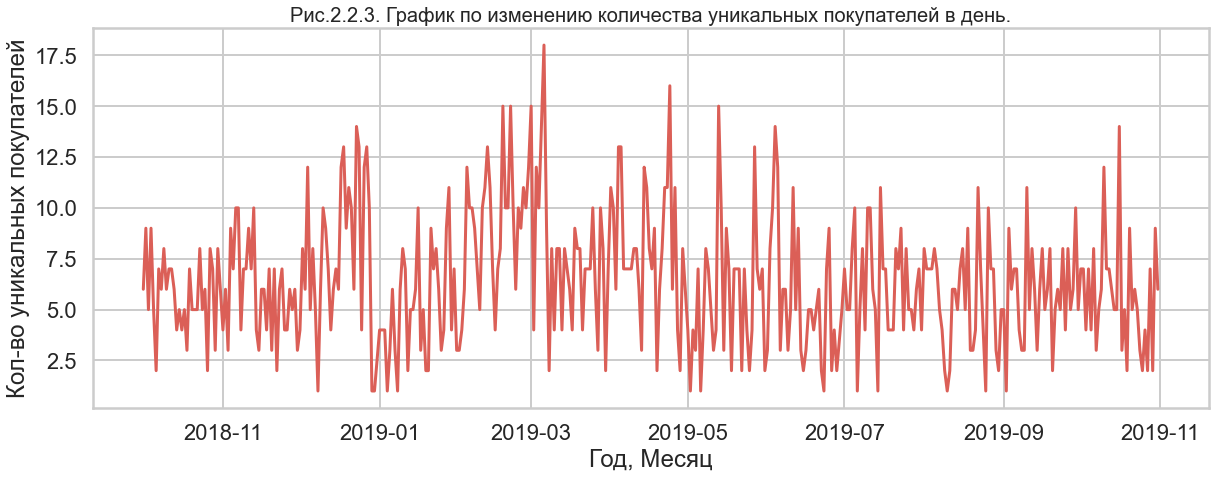

In [31]:
# График по изменению DAW во времени.
df_clean.groupby(['date']).agg({'customer_id': 'nunique'}) \
         .plot(figsize=(20,7), grid=True, legend=False)
plt.title('Рис.2.2.3. График по изменению количества уникальных покупателей в день.', fontsize=20)
plt.xlabel('Год, Месяц')
plt.ylabel('Кол-во уникальных покупателей')
plt.show()

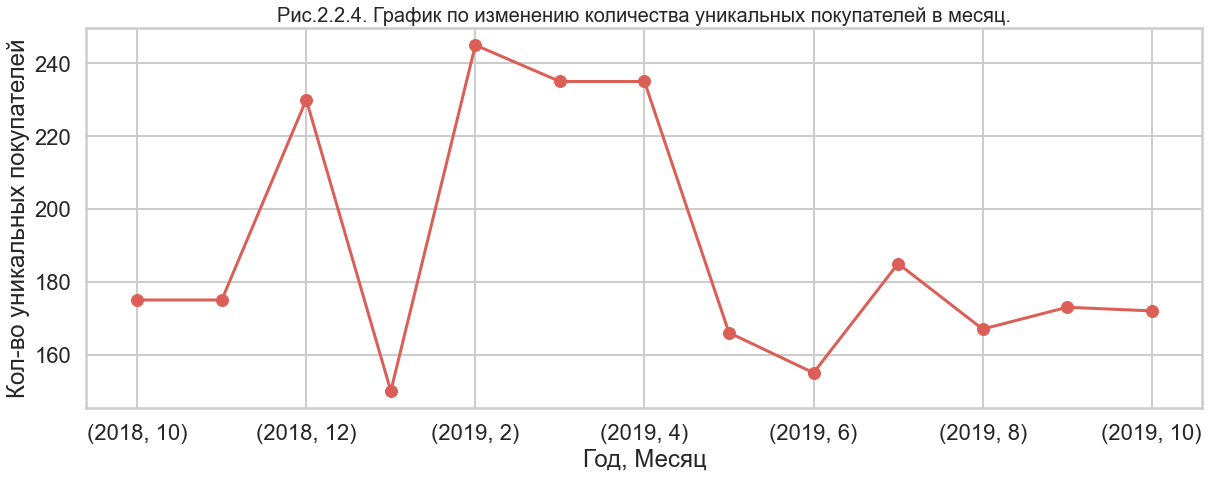

In [32]:
# График по изменению MAU во времени.
df_clean.groupby(['year', 'month']).agg({'customer_id': 'nunique'}) \
      .plot(marker='o', figsize=(20,7), grid=True, legend=False)
plt.title('Рис.2.2.4. График по изменению количества уникальных покупателей в месяц.', fontsize=20)
plt.xlabel('Год, Месяц')
plt.ylabel('Кол-во уникальных покупателей')
plt.show()

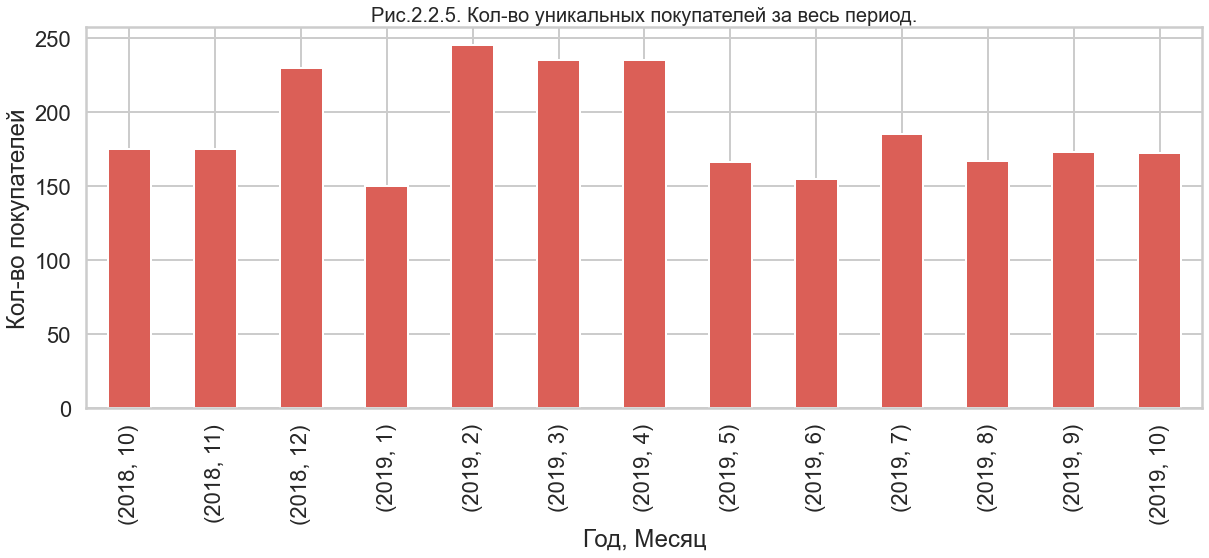

In [33]:
# Построение графика количества уникальных покупателй за весь период.
customers_per_month = df_clean.pivot_table(index=['year','month'],values='customer_id',aggfunc='nunique')
customers_per_month.columns = ['customers']
customers_per_month.plot(kind='bar', figsize=(20,7), grid=True, y=['customers'], legend=False)

plt.title('Рис.2.2.5. Кол-во уникальных покупателей за весь период.', fontsize=20)
plt.xlabel('Год, Месяц')
plt.ylabel('Кол-во покупателей')
plt.show()

#### Выводы

 - Всего покупателей в логе 2425 человек.
 - Большинство покупателей совершило всего 1 заказ.
 - Среднее кол-во уникальных покупателей за день: 6 человек.
 - Среднее кол-во уникальных покупателей за неделю: 43 человек.
 - Среднее кол-во уникальных покупателей за месяц: 189 человек.
 - Недельная аудитория: 14.6%
 - Месячная аудитория: 3.4%

Среднее кол-во уникальных покупателей за месяц 189 человек. Это небольшая цифра. Видно по метрики липкому фактору "sticky factor", его показатели низкие, очевидно, что к интернет-магазину обращаются нечасто.

Исходя из полученных графиков, с января 2019 по февраль 2019 виден рост активности покупателей. Заметно снижение активности с апреля до конца июня 2019 года. В июле 2019 виден небольшой рост по кол-ву уникальных покупателей. Активность покупателей больше всего проявляется в конце и начале года.

### 2.3. Посчитаем сколько заказов сделали клиенты интернет-магазина,  и построим графики по изменению кол-во заказов во времени.

In [34]:
# Посчитаем общее кол-во заказов.
orders_total = len(df_clean['order_id'].unique())
print("Всего заказов за весь период: {} ".format(orders_total))

Всего заказов за весь период: 2566 


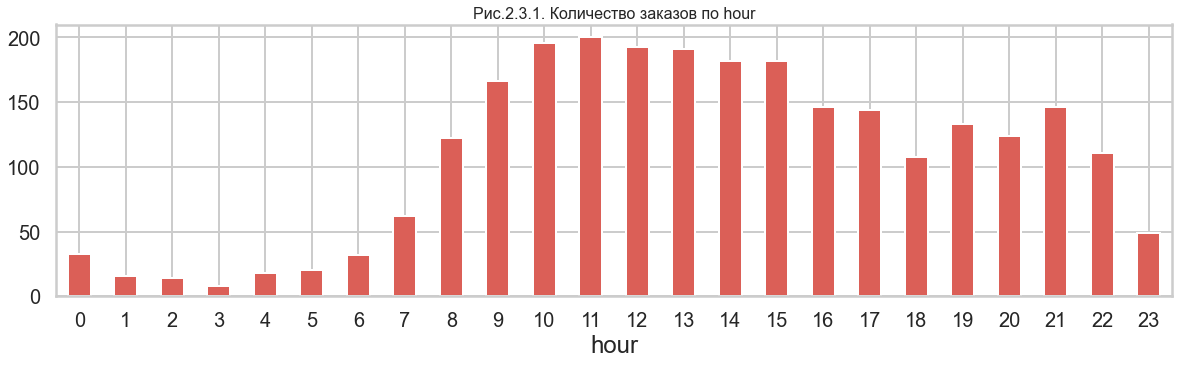

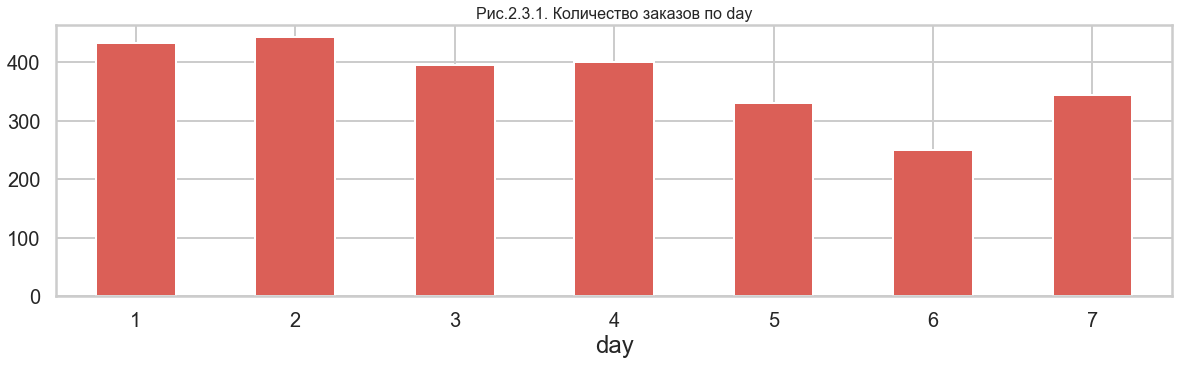

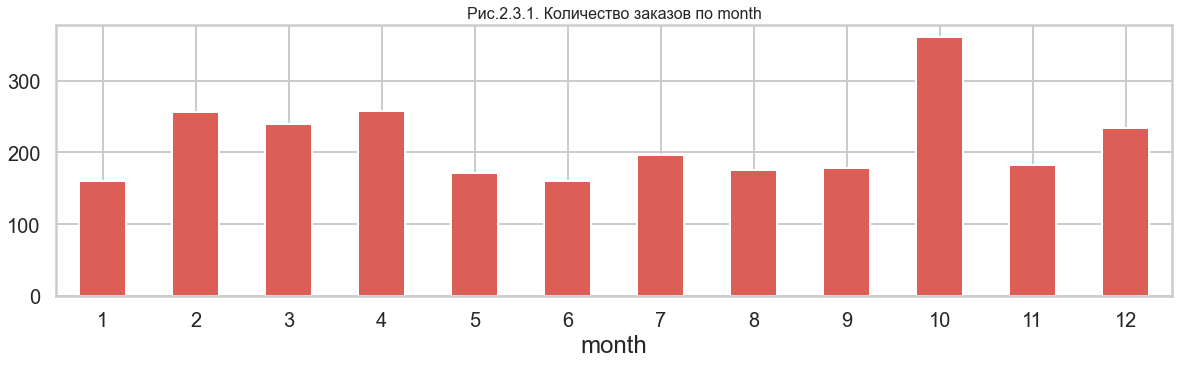

In [35]:
# Посмотрим на распределение заказов во времени, по часам, по дням, по месяцам. 
for columns in ['hour', 'day', 'month']:
    df_clean.pivot_table(index=columns, values='order_id', aggfunc='nunique', fill_value=0)\
    .plot(kind='bar', figsize=(20,5), grid=True, y=['order_id'], fontsize=20, legend=False)
    plt.title('Рис.2.3.1. Количество заказов по ' + columns, fontsize=16)
    plt.xticks(rotation=0)
    plt.show()

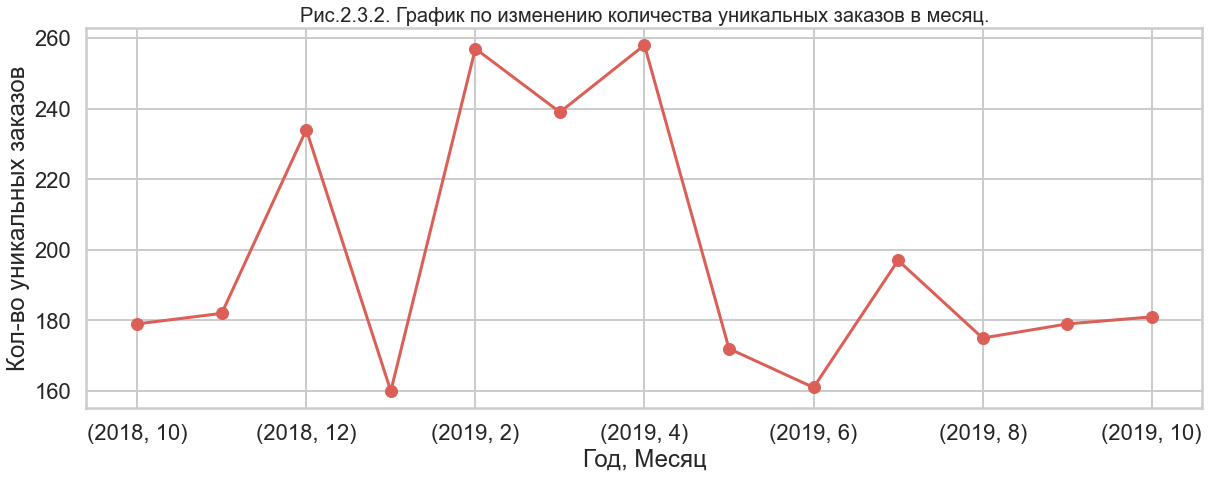

In [36]:
# График по изменению месячных заказов во времени.
df_clean.groupby(['year', 'month']).agg({'order_id': 'nunique'}) \
      .plot(marker='o', figsize=(20,7), grid=True, legend=False)
plt.title('Рис.2.3.2. График по изменению количества уникальных заказов в месяц.', fontsize=20)
plt.xlabel('Год, Месяц')
plt.ylabel('Кол-во уникальных заказов')
plt.show()

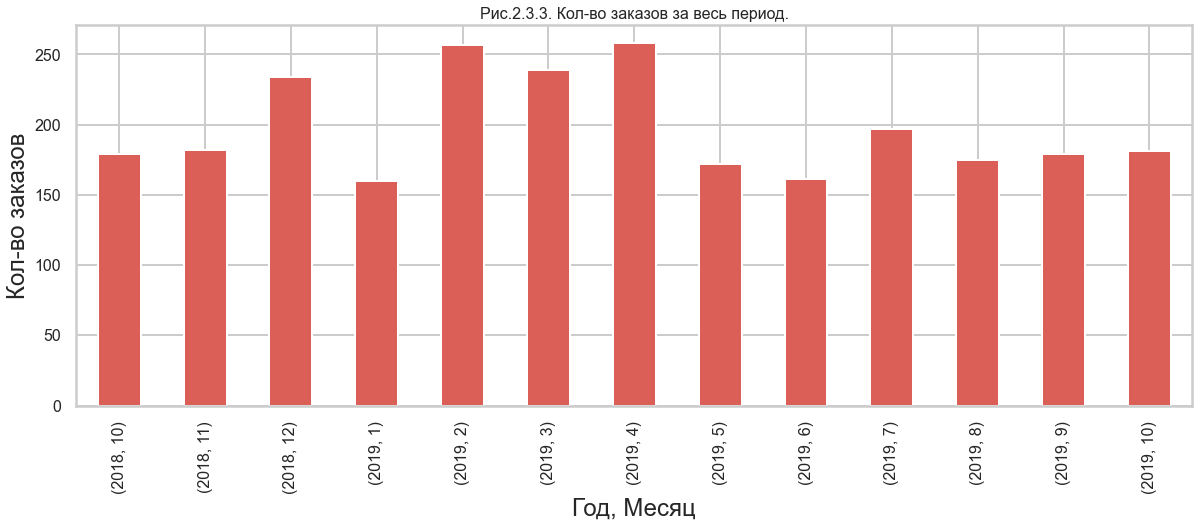

In [37]:
# Посчитаем количество заказов за весь период.
orders_per_month = df_clean.pivot_table(index=['year','month'],values='order_id',aggfunc='nunique')
orders_per_month.columns = ['orders']

orders_per_month.plot(kind='bar', y=['orders'], figsize=(20,7), grid=True, fontsize=16, legend=False)
plt.title('Рис.2.3.3. Кол-во заказов за весь период.', fontsize=16)
plt.xlabel('Год, Месяц')
plt.ylabel('Кол-во заказов')
plt.show()

#### Выводы

 - В таблице 2425 уникальных покупателей совершивших 2566 заказа за 395 дней.
 - Большинство заказов совершаются днем с 8 до 18. Пик приходится на 11 часов. Меньше всего клиенты заказывают с 23 до 7.
 - С воскресенья виден рост по совершению заказов. Пик приходится на вторник, с наибольшим кол-во заказов. Потом видим снижение, меньше всего заказывают в субботу. 
 - В апреле и феврале 2019 было сделано больше всего заказов, это связано с активностью клиентов. То есть, количество совершивших заказов, зависит от активности покупателей. 

### 2.4. Посмотрим на выручку c заказов. Какие товары интернет-магазина приносят наибольшую прибыль. Как меняется эта метрика с течением времени. Найдем бестселлеры за весь период.  

In [38]:
# Сумма выручки.
revenue_sum = df_clean['revenue'].sum()
print(f'Сумма выручки: {int(revenue_sum)} д.e.')

Сумма выручки: 2983600 д.e.


In [39]:
# Cредняя выручка с покупателя.
revenue_mean = df_clean['revenue'].mean()
print(f'Cредняя выручка с покупателя: {int(revenue_mean)} д.e.')

Cредняя выручка с покупателя: 659 д.e.


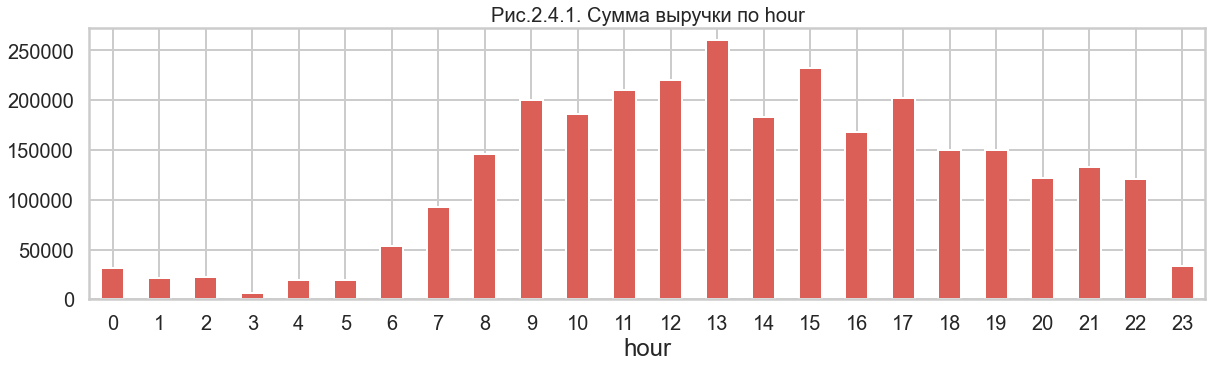

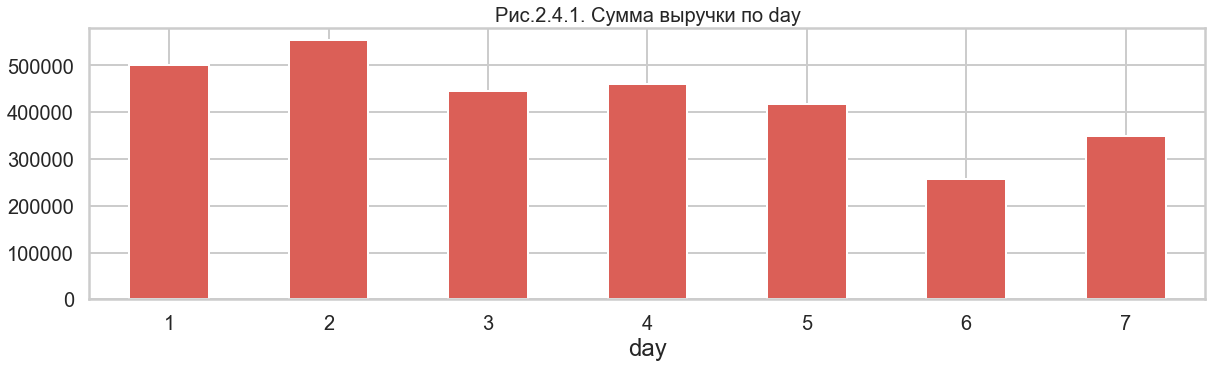

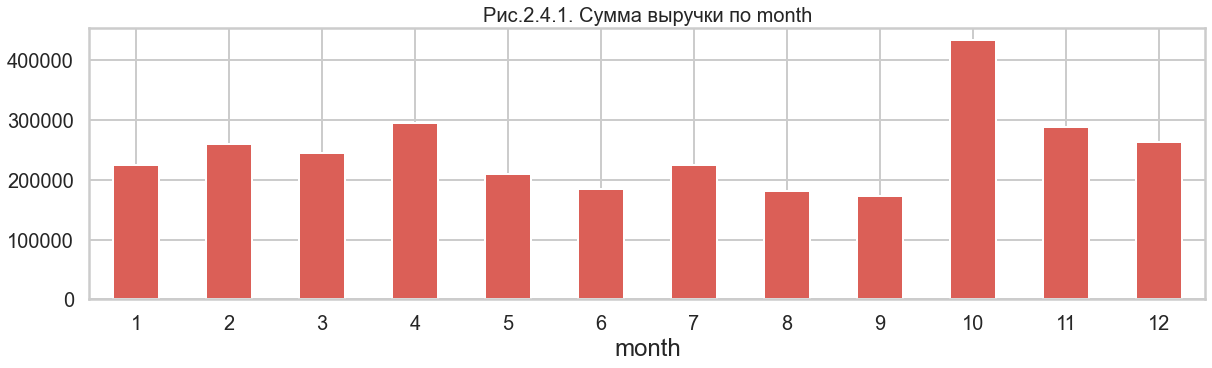

In [40]:
for columns in ['hour', 'day', 'month']:
    df_clean.pivot_table(index=columns, values='revenue', aggfunc='sum', fill_value=0)\
    .plot(kind='bar', figsize=(20,5), grid=True, y=['revenue'], fontsize=20, legend=False)
    plt.title('Рис.2.4.1. Сумма выручки по ' + columns, fontsize=20)
    plt.xticks(rotation=0)
    plt.show()

revenue  avg_revenue
year month                       
2019 4     295638.00 465.57      
2018 11    288613.00 730.67      
     12    262543.00 987.00      
2019 2     259788.00 799.35      
     3     245615.00 607.96      
2018 10    243748.00 615.53      
2019 7     225526.00 759.35      
     1     224186.00 1259.47     
     5     209437.00 308.45      
     10    189402.00 942.30      
     6     185092.00 566.03      
     8     181253.00 892.87      
     9     172759.00 796.12

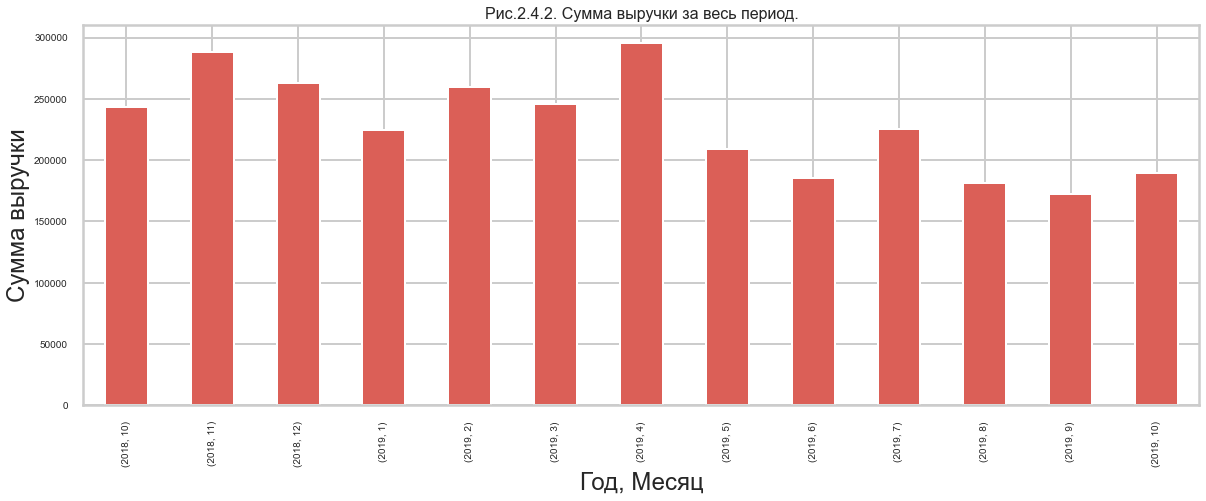

In [41]:
# Посчитаем сумму выручки за весь период.
revenue_per_month = df_clean.pivot_table(index=['year','month'],values='revenue',aggfunc=['sum', 'mean'])
revenue_per_month.columns = ['revenue', 'avg_revenue']
display(revenue_per_month.sort_values(by='revenue', ascending=False))

revenue_per_month.plot(kind='bar', y=['revenue'], figsize=(20,7), grid=True, fontsize=10, legend=False)
plt.title('Рис.2.4.2. Сумма выручки за весь период.', fontsize=16)
plt.xlabel('Год, Месяц')
plt.ylabel('Cумма выручки')
plt.show()

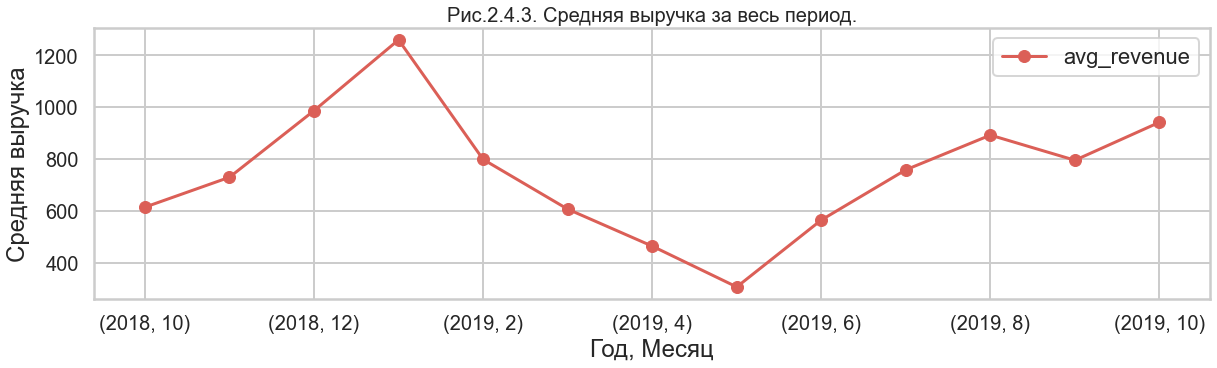

In [42]:
# Посчитаем среднюю выручку за весь период.
avg_revenue_per_month = df_clean.pivot_table(index=['year','month'],values='revenue',aggfunc='mean')
avg_revenue_per_month.columns = ['avg_revenue']
avg_revenue_per_month.sort_values(by='avg_revenue', ascending=False)

avg_revenue_per_month.plot(marker='o', y=['avg_revenue'], figsize=(20,5), grid=True, fontsize=20)
plt.title('Рис.2.4.3. Средняя выручка за весь период.', fontsize=20)
plt.xlabel('Год, Месяц')
plt.ylabel('Средняя выручка')
plt.show()

,year,month,revenue,customers,orders,revenue_per_customer,revenue_per_order
1,2018,11,288613.00,175,182,1649.22,1585.79
3,2019,1,224186.00,150,160,1494.57,1401.16
0,2018,10,243748.00,175,179,1392.85,1361.72
7,2019,5,209437.00,166,172,1261.67,1217.66
8,2019,6,185092.00,155,161,1194.14,1149.64
6,2019,4,295638.00,235,258,1258.03,1145.88
9,2019,7,225526.00,185,197,1219.06,1144.80
2,2018,12,262543.00,230,234,1141.49,1121.98
12,2019,10,189402.00,172,181,1101.17,1046.42
10,2019,8,181253.00,167,175,1085.35,1035.73


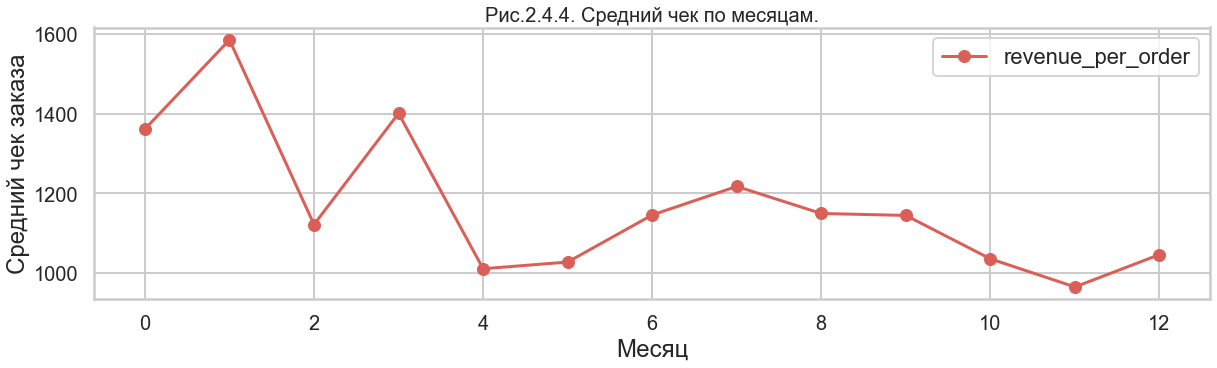

In [43]:
# Найдём средний чек покупателя revenue_per_customer — разделим показатель revenue на customer_id.
avg_check = df_clean.groupby(['year','month']) \
            .agg({'revenue':'sum','customer_id':'nunique', 'order_id':'nunique'}).reset_index()
avg_check.columns = ['year', 'month', 'revenue', 'customers', 'orders'] # переименуем столбцы 
avg_check['revenue_per_customer'] = avg_check['revenue'] / avg_check['customers']

# Найдём средний чек заказов revenue_per_order — разделим показатель revenue на orders.
avg_check['revenue_per_order'] = avg_check['revenue'] / avg_check['orders']

display(avg_check.sort_values(by='revenue_per_order',ascending=False))

avg_check.plot(marker='o', y=['revenue_per_order'], figsize=(20,5), grid=True, fontsize=20)
plt.title('Рис.2.4.4. Средний чек по месяцам.', fontsize=20)
plt.xlabel('Месяц')
plt.ylabel('Средний чек заказа')
plt.show()

#### Выводы

 - Сумма выручки: 2983600 д.e.
 - Cредняя выручка с покупателя: 659 д.e.
 - Наибольшая выручка приходится на 13.00 вторника. 
 - В течение всего периода 2018-2019 г.г. наблюдается негативная динамика суммарной выручки от продаж. Общая сумма выручки в конце 2019 г. сократилась почти в 1,5 раза, относительно прошлого года. Возможно причиной могло послужить общее ухудшение условий предпринимательской деятельности.
 - Темп роста продаж = (выручка текущего периода / выручка прошлого периода). Динамика продаж отрицательная.
 - Снижение доходов с продаж также видно по среднему чеку покупателя. В октябре 2018 года средний чек покупателя составлял 1361 а через год, в октябре 2019 г. 1046 д.е.

### Какие товары интернет-магазина приносят наибольшую прибыль. Найдем бестселлеры за весь период. 

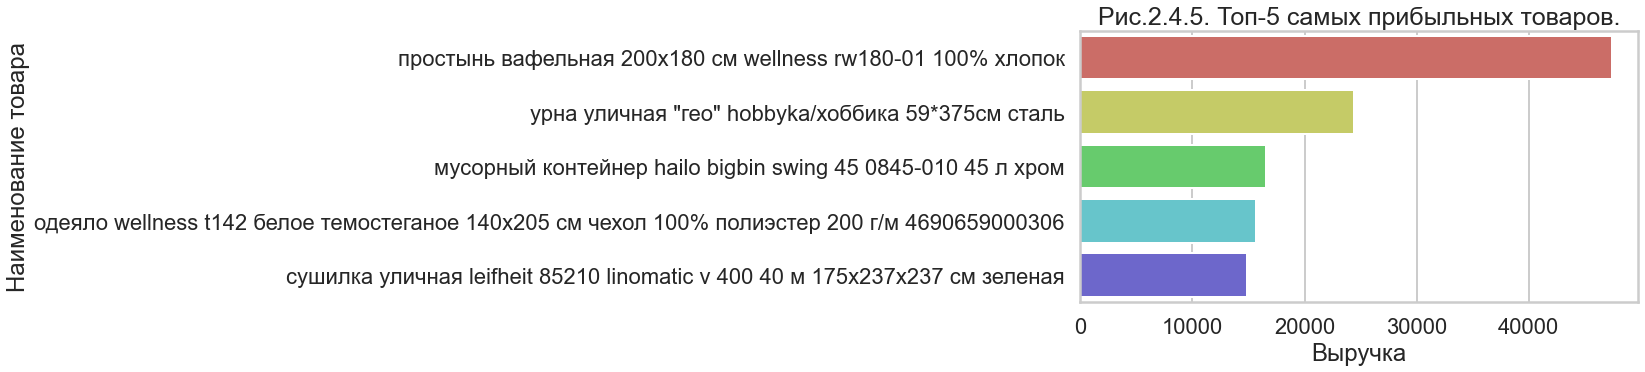

In [44]:
# Посмотрим какие товары интернет-магазина приносят наибольшую прибыль.
most_profit_products = df_clean.pivot_table(index=['order_id','product'], values='revenue', aggfunc='sum')\
                               .sort_values(by='revenue', ascending=False).reset_index()
plt.figure(figsize=(10,5))
plt.title('Рис.2.4.5. Топ-5 самых прибыльных товаров.', fontsize=25)
sns.barplot(x='revenue', y='product', data=most_profit_products[:5]).set(xlabel='Выручка', 
                                                                         ylabel='Наименование товара')
plt.show()

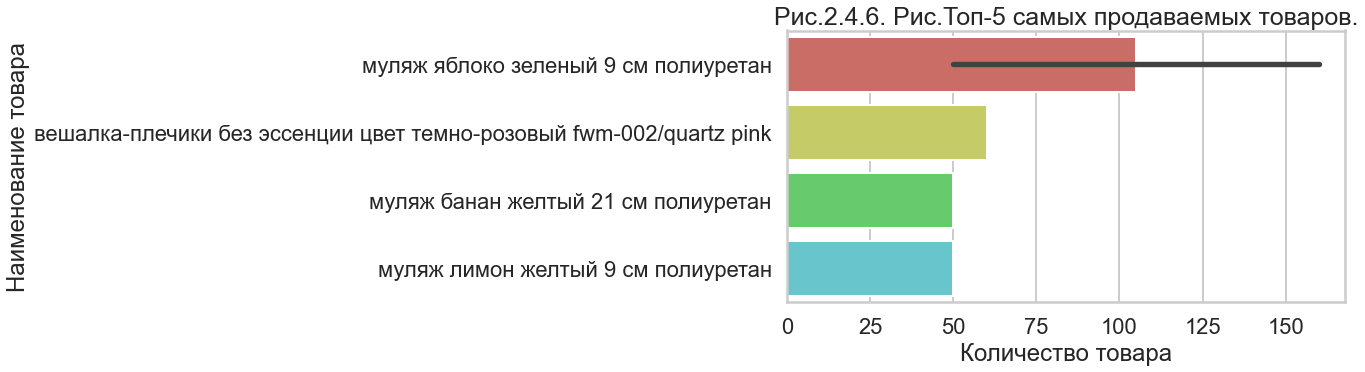

In [45]:
# Бестселлеры за 2018-2019 г.г.
all_time_best_sellers = df_clean.pivot_table(index=['order_id','product'],\
                                                   values='quantity',\
                                                   aggfunc='sum')\
                                                   .sort_values(by='quantity',ascending=False).reset_index()

plt.figure(figsize=(10,5))
plt.title('Рис.2.4.6. Рис.Топ-5 самых продаваемых товаров.', fontsize=25) #alpha=.80
sns.barplot(x='quantity',y='product',data=all_time_best_sellers[:5]).set(xlabel='Количество товара', 
                                                                         ylabel='Наименование товара')
plt.show()

#### Выводы

**Топ-5 самых прибыльных товара за весь период** 
 - простынь вафельная 200х180 см wellness 
 - урна уличная "гео" hobbyka/хоббика
 - мусорный контейнер hailo bigbin swing 45
 - одеяло wellness t142 белое темостеганое 140х205 см
 - сушилка уличная leifheit 85210 linomatic 

**Топ-5 самых продаваемых товаров за весь период**
 - муляж яблоко зеленый 9 см полиуретан
 - вешалка-плечики без эссенции цвет темно-розовый fwm-002/quartz pink
 - муляж яблоко зеленый 9 см полиуретан
 - муляж банан желтый 21 см полиуретан	
 - муляж лимон желтый 9 см полиуретан

### 2.5. Построим матрицу корреляций.

Для выявления коррелирующих признаков в датафрейме построим матрицу корреляции с помощью метода .corr()

<AxesSubplot:>

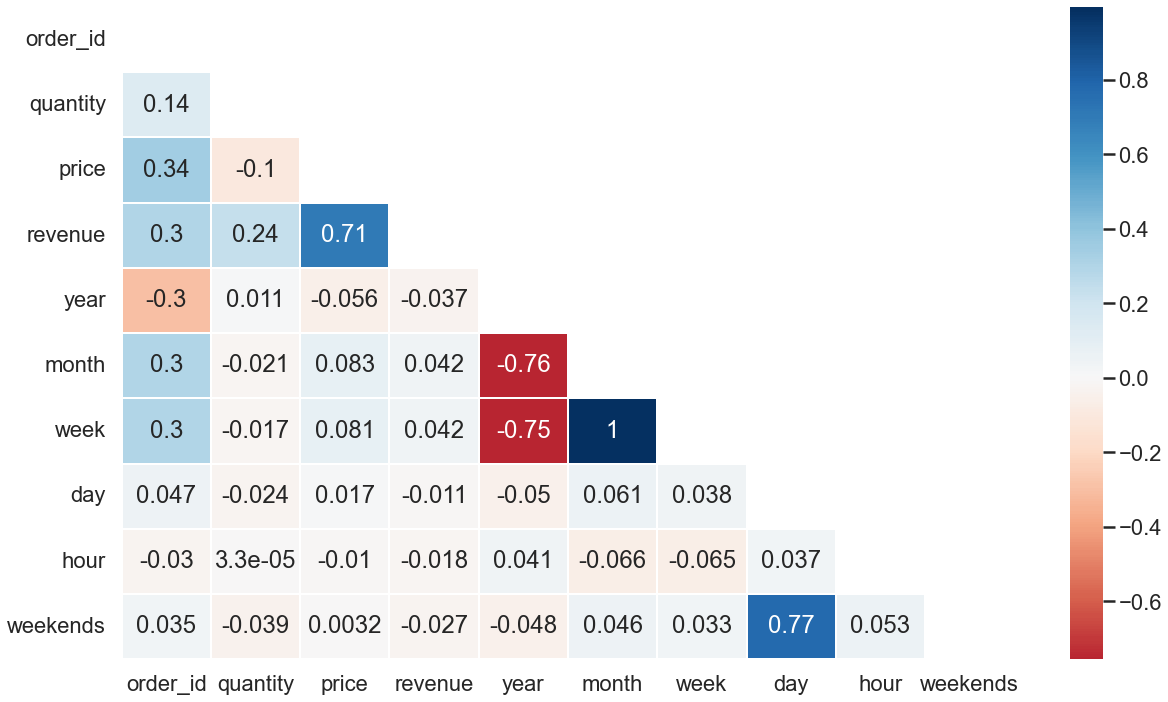

In [46]:
# Построим матрицу корреляций
_ , ax = plt.subplots(figsize =(20, 12))
mask = np.zeros_like(df_clean.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.set_style('whitegrid')
sns.heatmap(df_clean.corr(),
annot=True,
linewidths=.2, 
            ax = ax,
            linecolor='white',
            cmap = 'RdBu',
            mask = mask,
            fmt='.2g',
            center = 0,
            #square=True
            )


#### Выводы

Наблюдается логическая взаимозависимость между переменными. 
Есть взаимозависимость выручки с ценой товара, corr = 0,71, то есть чем выше цена товара, тем больше выручка. Также, есть другие переменные, которые положительно коррелируют с выручкой, это количество заказов и товара.

## Шаг 3. Категоризация наименования товара

### 3.1. Лемматизация.

In [47]:
# Посмотрим уникальные значения столбца 'product', используя метод unique().
unique_product = df_clean['product'].unique() 

# Выделим леммы в значениях столбца с наименованием товара, которые пригодиться для создания словаря, 
# который будем исползать для категоризации товара.
m = Mystem()
string = '; '.join(unique_product) # сохраным результат в переменной string
lemmas = m.lemmatize(string) # сохраным результат в переменной lemmas
#print(Counter(lemmas)) # посчитаем количество упоминаний, вызовом Counter из модуля collections

### Вывод

Из упомянутых лемм в значениях столбца с 'product', выделю следующие 10 категорий: 
 - хранение 
 - мебель
 - кухня 
 - ванная
 - текстиль 
 - сад
 - уборка
 - инструменты
 - гигиена
 - декор

### 3.2. Категоризация наименования товара.

Для составления словаря для категоризации будем использовать список с уникальным наименованием товара unique_product, c посчитанным количеством упоминаний вызовом Counter.

In [48]:
# Cоздадим словарь с категориями и списком слов из лемм и списка unique_product.

category_dictionary = {
    'хранение':['бак','вакуумный','весы','петля','вешалка','вешалки','вкладыши','корзина','короб','коробка','кофр', 
                'крючок','обувная','лоток','мусора','монетчатый','мусорный','набор вешалок','котовник','петля', 
                'сумка','тележ','плечики','полки','решетка','складная','стеллаж','сумка','тележка',
                'хозяйственная','урна','этажерка','ящик'],
    
    'мебель': ['подставка','стеллаж','комод','карниз','этажерка','пуф','обувниц','светиль','фото',
               'для обув','комод','защитный','обувница','обуви','светильник'],
    
    'кухня':['банка','бидон','блюдо','блюдце','ваза','вилка','разделочная','емкость','жестяная','измельчитель',
             'картофелемялка','кастрюля','кипятильник','кисточка','хлебница','интерьерный','кружка',
             'крышка', 'кувшин', 'кухонное','кухонные','столовая','чайная','холодца','мантоварка',
             'пароварка','масленка','мерный','стакан','миксер','мини-сковорода','мирт','миска','модульная', 
             'набор бокалов','набор для пикника','набор ножей','webber','набор стаканов','набор столовых приборов',
             'набор фужеров','фужер','стакан','салатник','нож','ножеточка','овощеварка','овощечистка',
             'подушка','покрывало','просеиватель','противень','разделочная','салатник','салфетка','сковорода',
             'скребок','соковарка','соковыжималка','стакан','стеклянная','тepмокружка','тарелка', 'терка',
             'термокружка','толкушка','фал','форма','хлебница','ложка','чайная','чайник','электроштопор','сито', 
             'подставка для яйца'],
    
    'ванная':['ванна','вантуз','ведро','держатель','дозатор','ерш','запасная','ванной','коврик','ванной', 
              'ковш','мыльница','ванн','подголовник','пробка','унитаза'],
    
    'текстиль':['скатерть','двуспальное','постельное','белье', 'ковер', 'кольца', 'штор', 'полотенце','штора', 
                'ковер', 'махровое','халат','набор ковров', 'наволочка', 'наматрасник', 'одеяло', 'плед', 
                'подкладка', 'чехол','полотенце','простыня','скатерть','халат','чехол','штора',
                'простынь вафельная 200х180 см wellness', 'наматрацник natures бархатный', 'покрывало жаккард шенилл birhome',
                'покрывало жаккард шенилл'],
    
    'cад':['а патио','адиантум','азалия','аквилегия','алиссум','амариллис','альбука','андесса','антижир',
           'арбуз','артемизия','аспарагус','астра','ахарница','бадан','базилик','бак','баклажан',
           'бакопа','бальза','барвинок','бархатцы','бегония','буддлея', 'бузульник', 'валериана', 'вербена',
           'виола', 'газания', 'гвоздика','гардения', 'георгина', 'герань', 'гербера', 'гимнокалициум', 'гиностемма',
           'гипсофила','годеция','горох','гортензия', 'декабрист', 'декоративная','дендробиум', 
           'джункус', 'томата', 'диффенбахия','дыня', 'ель', 'чабер', 'замиокулькас', 'зверобой', 'земляника', 
           'змееголовник', 'импатиенс','иссоп','сантолина', 'кабачок', 'каланхое', 'календула', 'калибрахоа', 
           'калла', 'калоцефалус', 'камнеломка','кампанула', 'капуста', 'кипарисовик', 'клен', 'клубника',
           'колокольчик', 'растение', 'кориандр','космея', 'крассула', 'крокусы','лаванда', 'мята', 'лантана', 
           'лапчатка','лен', 'литопс', 'порей', 'львиный', 'зев','любисток','мединилла','мелисса','многолетнее', 'молодило',
           'петрушка','морковь', 'мята', 'настурция','незабудка','нолина', 'огурец', 'растение','однолетнее', 'осина',
           'орехоколка','патиссон','пахира', 'пеларгония', 'пеларгония', 'петрушка', 'петуни', 'подвесное',
           'цветов','портулак', 'примула', 'пуансеттия','радермахера', 'роза','розмарин','рудбекия','скиммия', 
           'спатифиллум','суккулент','сциндапсус', 'тимьян','томат', 'томата', 'тортница', 'тюльпан', 'рассада', 
           'ранункулус','тыква', 'фаленопсис','фиалка', 'фикус', 'фиттония', 'флокс', 'фуксия', 'хризантема', 
           'целозия', 'цикламен', 'шалфей','эвкалипт','эпипремнум', 'эхеверия', 'эшшольция', 'ясколка', 'шеффлера',
           'хризолидокарпус', 'циперус', 'юкка нитчатая', 'рассада зелени для кухни', 'нефролепис', 'овсянница сизая серый',
           'хлорофитум'],
    
    'уборка':['ароматизиро', 'белье', 'прищепки','веник','гипоаллергенный','гель','гладильная','набор vileda', 
              'набор прищепок','доска','губка','гладильная','защитная','соль','кондиционер','контейнер','стирки', 
              'насадка', 'насадка','швабры','мытья','швабре','сушилка','настенная','настурция','ведра', 
              'пена','перчатки','тряп','швабр','совок','гладил','глажен','прищеп','налет','антижир','пылесос','крем', 
              'стир', 'щетка','сушилк','веник','подрукавник','совком', 'для чистки','стирки','мыть', 'средство',
              'мойк', 'утюг', 'покрытие','гладильной', 'пылесос','гладильной','совок','щетка','средство', 
              'таз','тряпка','корзина','швабра','щетка','средство', 'таз', 'корыто', 'паста для полировки', 
              'вантуз', 'швабр','губка','веник','сменный','дозатор', 'насадка', 'сметка', 'скребок', 'окномойка',
              'совок','чистящий','чистки','антижир','ведр','ерш','тряпка','отбеливатель','для стирки','стиральный',
              'сушилка для белья', 'настенная сушилка для', 'чехол для гладильной доски', 'сушилка для белья',
              'ароматизированное средство дудаления', 'чехол для гладильной доски', 'сушилка для белья', 'attribute', 'gimi',
              'сушилка для белья потолочная лиана люкс', 'сушилка для белья потолочная лиана люкс', 
              'сушилка для белья потолочная zalger lift basic', 'linomatic', 'сушилка уличная', 'leifheit', 
              'сушилка уличная leifheit 85210 linomatic v 400 40 м 175х237х237'],

    
    'инструменты':['инструмент','сверел','сверло','напильник','стремянк','стяжк','шпингалет','сварка',
                   'миксер','крепеж','пружин','петл','линейк','гои','бензин','завертка','крепеж','лестница',
                   'линейка','лопатка','шнур','строительного','многофункциональный','набор прецизионных','полировки',
                   'пьезозажигалка', 'ручка','сверло','седум','сетка','сметка','стремянка','стяжка','термометр',
                   'уголок','фарфоровая','сварка','шило','шнур','шпагат','штангенциркуль', 'чехол eurogold reflector' ],
    
    'гигиена':['зубная','мыло','жидкое','мыло-скраб','увлажняющая','маска','фен'],
    'декор':['искусственная', 'искусственный', 'декоративная', 'котовник', 'муляж', 'новогоднее', 'подарочный',
            'фоторамка', 'комнатное растение в горшке', 'муляж баклажан' ],
}

In [49]:
# Напишем функцию которая вернет категорию по значению ‘product’.
def categorize_product(product):
    """ 
    Возвращает категорию по значению ‘product’ в датасете ‘ecommerce’, 
    используя словарь с категориями ‘category_dictionary’.
    """ 
    for category, items_of_list in category_dictionary.items():
        for item in items_of_list:
            if item in product:
                return category
    return category

In [50]:
# Осталось создать отдельный столбец с категориями по наименованию товара, 
# и в его ячейках записать значения, возвращаемые функцией.
df_clean['category'] = df_clean['product'].apply(categorize_product)
display(df_clean.shape)
df_clean.sample(5)

(4523, 15)

,date_x,customer_id,order_id,product,quantity,price,revenue,date,year,month,week,day,hour,weekends,category
3426,2019-05-07 11:00:00,1a725b7e-f09b-4bc1-8579-b9893adb91f8,14729,петуния baby doll розовая с белыми брызгами объем 05 л,1,112.00,112.00,2019-05-07,2019,5,19,2,11,0,cад
4432,2019-06-03 21:00:00,de671b84-3abe-4dba-b1d8-c2858c0029b3,71594,покрывало karna вельсофт с вышивкой damask 200x220 см 9234567038126,1,1664.00,1664.00,2019-06-03,2019,6,23,1,21,0,кухня
5414,2019-06-17 10:00:00,f2b76506-06da-46b8-950e-81ca072b0ef3,14863,овсянница сизая серый объем 1 л,2,105.00,210.00,2019-06-17,2019,6,25,1,10,0,cад
4073,2019-05-28 09:00:00,c04be3cd-fa24-4d94-b2de-2c863a315dd2,14824,кореопсис золотой маяк желтый объем 1 л,2,112.00,224.00,2019-05-28,2019,5,22,2,9,0,декор
5954,2019-07-25 14:00:00,3a7ddab1-066e-4cd9-909a-1d31900b396a,14908,пеларгония зональная махровая лососевая,2,169.00,338.00,2019-07-25,2019,7,30,4,14,0,cад


In [51]:
# Выведем статистику по категориям товарного ассортимента.
category_ecommerce = df_clean.groupby('category').agg({'product':'count'}).reset_index()
category_ecommerce.columns = ['category', 'products']
category_ecommerce['ratio'] = ((category_ecommerce['products'] / len(ecommerce))*100).round(1).astype('str')+'%'
display(category_ecommerce.sort_values(by='products', ascending = False))

,category,products,ratio
0,cад,2584,38.4%
9,хранение,583,8.7%
5,кухня,313,4.6%
3,декор,282,4.2%
8,уборка,258,3.8%
1,ванная,254,3.8%
7,текстиль,143,2.1%
4,инструменты,63,0.9%
6,мебель,30,0.4%
2,гигиена,13,0.2%


### Вывод

Самую большую долю товарного ассортимента занимает категория «сад» 38,4% от общего количества товарного ассортимента, каоторый заказывали клиенты, можно её назвать основной. В эту категорию вошли все растения, рассада и элементы для дачи и сада. Потом идет категория «хранение» 8,7%, «кухня» 4,6%, «декор» 4,2%, «уборка» 3,8%.

## Шаг 4. Анализ товарного ассортимента

### 4.1. Топ-5 самых продаваемых товаров в каждой категории по кол-ву заказов за весь период.

In [52]:
# Сгруппируем данные по наименованию товара для кажкой категории. 
groupby_product = df_clean.groupby('product')\
                           .agg({'category':'first', 'order_id':'nunique', 'customer_id':'nunique', 
                                 'quantity':'sum', 'revenue':'sum'})\
                           .reset_index().sort_values(by='order_id', ascending=False)
groupby_product.columns = ['product', 'category', 'orders', 'customers', 'quantity', 'revenue']

# Найдем топ-5 самых продаваемых товаров в каждой категории по кол-ву заказов за весь период.
for category in groupby_product['category'].unique():
    print()
    display("ТОП-5 самых продаваемых товаров в категории по кол-ву заказов: «{}»".format(category))
    display(groupby_product[groupby_product['category']==category].head(5))
    print()

'ТОП-5 самых продаваемых товаров в категории по кол-ву заказов: «cад»'

,product,category,orders,customers,quantity,revenue
994,пеларгония розебудная red pandora укорененный черенок,cад,62,61,80,10788.00
992,пеларгония розебудная prins nikolai укорененный черенок,cад,53,52,62,8356.00
966,пеларгония зональная диам. 12 см сиреневый полумахровый,cад,50,46,57,9652.00
991,пеларгония розебудная mary укорененный черенок,cад,37,33,45,6066.00
993,пеларгония розебудная queen ingrid укорененный черенок,cад,30,28,38,5175.00


'ТОП-5 самых продаваемых товаров в категории по кол-ву заказов: «хранение»'

,product,category,orders,customers,quantity,revenue
1536,сумка-тележка 2-х колесная gimi argo синяя,хранение,44,41,44,47258.00
1799,тележка багажная delta тбр-20 синий грузоподъемность 25 кг сумка и 50 кг каркас россия,хранение,15,15,15,10983.00
1798,тележка багажная delta тбр-20 коричневый с оранжевым грузоподъемность 25 кг сумка и 50 кг каркас россия,хранение,13,13,14,9523.00
739,муляж баклажан 18 см,хранение,10,10,23,1357.00
1800,тележка багажная delta тбр-20 черный с серым грузоподъемность 25 кг сумка 50 кг каркас россия,хранение,9,10,10,7306.00


'ТОП-5 самых продаваемых товаров в категории по кол-ву заказов: «уборка»'

,product,category,orders,customers,quantity,revenue
1756,таз пластмассовый со стиральной доской иж 1404021,уборка,9,9,9,2997.00
284,гладильная доска ника дсп эконом 1065х29 эк1,уборка,7,6,17,7633.00
266,гладильная доска ника blues 124х46 см 5757,уборка,7,7,7,17786.00
1092,подрукавник складной ника п,уборка,5,5,5,1120.00
276,гладильная доска ника бэлль 1065х29 см б,уборка,5,5,5,2734.00


'ТОП-5 самых продаваемых товаров в категории по кол-ву заказов: «декор»'

,product,category,orders,customers,quantity,revenue
789,муляж персики мини полиуретан d-6 см,декор,8,9,29,608.00
1999,цветок искусственный крокус 20 см,декор,7,5,41,855.00
768,муляж красное яблоко мини полиуретан d-6 см,декор,7,7,63,1279.00
801,муляж яблоко оранжевый 85 см полиуретан,декор,6,6,52,2838.00
784,муляж перец чили в связке красный 60 см полиуретан fancy fair/ff rp60,декор,5,5,10,1870.00


'ТОП-5 самых продаваемых товаров в категории по кол-ву заказов: «текстиль»'

,product,category,orders,customers,quantity,revenue
1087,подкладка под чехол zalger 520114 135х50 см войлок,текстиль,7,7,9,1143.00
1088,подкладка под чехол zalger 520140 135х50 см поролон,текстиль,6,6,6,762.00
2064,чехол для гладильной доски attribute metal 140х60 см abm106,текстиль,5,5,14,10530.00
2091,чехол для костюма 60х110 см rozenbal r261016,текстиль,4,4,6,984.00
2080,чехол для гладильной доски zalger 520116 130х46 см хлопок для доски 125х42 см,текстиль,3,3,3,373.00


'ТОП-5 самых продаваемых товаров в категории по кол-ву заказов: «ванная»'

,product,category,orders,customers,quantity,revenue
1425,сиденье в ванну раздвижное белый св5 ника,ванная,6,7,8,2476.00
346,ерш унитазный с деревянной ручкой ваир 1712012,ванная,6,6,85,4616.00
613,корыто оцинкованное 45 л бесшовное 1303007,ванная,5,5,7,5243.00
543,коврик хлопковый 40х60 см цвета в ассортименте 6194,ванная,5,4,12,1164.00
2159,штора для ванной комнаты quadretto 240х200 см белая bacchetta 4062,ванная,5,5,5,5995.00


'ТОП-5 самых продаваемых товаров в категории по кол-ву заказов: «кухня»'

,product,category,orders,customers,quantity,revenue
655,"кувшин пластмассовый с крышкой ""кумган"" 20 л 1408003",кухня,5,5,5,745.00
369,измельчитель овощей ручной шк-4 деревянный 3 ножа 1516020,кухня,4,4,7,3353.00
503,коврик интерьерный для кухни la bruschetta из пвх прямоугольный 45х75 см apache 4661,кухня,3,3,3,2250.00
1820,термокружка яромир кремль яр-2406м 400 мл,кухня,3,3,3,914.00
1395,салатник luminarc кутюр 27 см h3529,кухня,3,3,6,1524.00


'ТОП-5 самых продаваемых товаров в категории по кол-ву заказов: «инструменты»'

,product,category,orders,customers,quantity,revenue
1529,стяжка оконная с болтом ст-55 цинк 1108354,инструменты,4,3,36,728.00
1419,седум почвопокровный смесь окрасок объем 1 л,инструменты,3,3,7,412.00
1511,стремянка dogrular класс плюс 4 ступени 123304,инструменты,2,2,2,2848.00
1821,термометр на окно уличный на липучках т-5 h-20 см 1210035,инструменты,2,2,3,132.00
1520,стремянка бытовая framar slimmy 4 ступени,инструменты,2,2,3,5622.00


'ТОП-5 самых продаваемых товаров в категории по кол-ву заказов: «мебель»'

,product,category,orders,customers,quantity,revenue
455,карниз для ванной комнаты виолет раздвижной 280 см с кольцами бежевый 2810/2,мебель,4,3,6,1344.00
1095,подставка для обуви резиновая attribute 80x40 см amc080,мебель,3,3,3,1062.00
564,комод эльфпласт № 3 алфавит оранжевый 301о,мебель,3,2,3,4047.00
456,карниз для ванной комнаты виолет раздвижной 280 см с кольцами белый 2810/6,мебель,2,2,25,5360.00
453,карниз для ванной комнаты виолет раздвижной 210 см с кольцами голубой 2110/3,мебель,2,2,2,314.00


'ТОП-5 самых продаваемых товаров в категории по кол-ву заказов: «гигиена»'

,product,category,orders,customers,quantity,revenue
932,паста зубная для профилактики заболеваний десен kobayashi японский кипарис и белая береза 100 г япония 4987072072752,гигиена,2,2,6,5394.00
1937,фен дорожный delta dl-0904 бордовый с черным 2 режима мощности 1400 вт россия,гигиена,1,1,1,592.00
1919,увлажняющая маска brown rice moisture 330 мл корея 599928,гигиена,1,1,1,442.00
367,зубная паста zact lion whitening toothpaste 100 г 8850002805064,гигиена,1,1,1,134.00
366,зубная паста zact lion smokers toothpaste 100 г 8850002805040,гигиена,1,1,1,134.00


### 4.2. Топ-5 самых прибыльных товаров в каждой категории за весь период.

In [53]:
# Сгруппируем данные по наименованию товара для кажкой категории. 
groupby_product_rev = df_clean.groupby('product')\
                           .agg({'category':'first', 'order_id':'nunique', 'customer_id':'nunique', 
                                 'quantity':'sum', 'revenue':'sum'})\
                           .reset_index().sort_values(by='revenue', ascending=False)
groupby_product_rev.columns = ['product', 'category', 'orders', 'customers', 'quantity', 'revenue']

# Найдем Топ-5 самых прибыльных товаров в каждой категории за весь период.
for category in groupby_product_rev['category'].unique():
    print()
    display("ТОП-5 самых прибыльных товаров в категории: «{}»".format(category))
    display(groupby_product_rev[groupby_product_rev['category']==category].head(5))
    print()

'ТОП-5 самых прибыльных товаров в категории: «текстиль»'

,product,category,orders,customers,quantity,revenue
1142,простынь вафельная 200х180 см wellness rw180-01 100% хлопок,текстиль,2,1,30,53232.00
903,одеяло wellness t142 белое темостеганое 140х205 см чехол 100% полиэстер 200 г/м 4690659000306,текстиль,1,1,10,15680.00
856,наматрацник natures бархатный бамбук бб-н-1-2 односпальный 100% хлопок стеганый 90х200 см с резинкой по углам белый,текстиль,1,1,12,14196.00
1450,скатерть круглая d-175 см 50% полиэстер 50% хлопок белая wellness mld-187-эстель*01,текстиль,1,1,10,11400.00
2064,чехол для гладильной доски attribute metal 140х60 см abm106,текстиль,5,5,14,10530.00


'ТОП-5 самых прибыльных товаров в категории: «хранение»'

,product,category,orders,customers,quantity,revenue
1536,сумка-тележка 2-х колесная gimi argo синяя,хранение,44,41,44,47258.00
1923,"урна уличная ""гео"" hobbyka/хоббика 59*375см сталь",хранение,1,1,5,24370.00
1565,сумка-тележка хозяйственная andersen scala shopper plus lini синяя 133-108-90,хранение,4,4,4,22796.00
1561,сумка-тележка хозяйственная andersen scala shopper lini синяя 112-108-90,хранение,4,3,4,18296.00
804,мусорный контейнер hailo bigbin swing 45 0845-010 45 л хром,хранение,1,1,3,16536.00


'ТОП-5 самых прибыльных товаров в категории: «уборка»'

,product,category,orders,customers,quantity,revenue
266,гладильная доска ника blues 124х46 см 5757,уборка,7,7,7,17786.00
233,гладильная доска colombo avantgard 120х40 см,уборка,3,3,3,14712.00
1614,сушилка meliconi stendy junior,уборка,2,2,2,11188.00
123,веник сорго с деревянной ручкой с 4-мя швами rozenbal r206204,уборка,1,1,20,11000.00
231,гладильная доска attribute teflonix 130х46 см abt142,уборка,2,2,2,7798.00


'ТОП-5 самых прибыльных товаров в категории: «cад»'

,product,category,orders,customers,quantity,revenue
800,муляж яблоко зеленый 9 см полиуретан,cад,7,10,308,17572.00
1722,сушилка уличная leifheit 85210 linomatic v 400 40 м 175х237х237 см зеленая,cад,1,1,1,14917.00
1483,спатифиллум шопен d-12 см,cад,2,2,46,11512.00
994,пеларгония розебудная red pandora укорененный черенок,cад,62,61,80,10788.00
948,пеларгония зональная диам. 12 см красная махровая,cад,21,21,63,10514.00


'ТОП-5 самых прибыльных товаров в категории: «ванная»'

,product,category,orders,customers,quantity,revenue
511,коврик придверный attribute nature кокосовый 60x40 см amc015,ванная,4,4,54,16888.00
531,коврик придверный с дизайном из резины и кокоса 585*89 gothic iron slice / готический узор 4468,ванная,3,4,4,6568.00
500,коврик для ванной прямоугольный 4.5см. shaggy 70х100см голубой 603001-003,ванная,2,2,3,6297.00
2159,штора для ванной комнаты quadretto 240х200 см белая bacchetta 4062,ванная,5,5,5,5995.00
497,коврик для ванной комнаты gobi полиэстер 120х70 см темно-зеленый spirella 1012778,ванная,1,1,1,5474.00


'ТОП-5 самых прибыльных товаров в категории: «инструменты»'

,product,category,orders,customers,quantity,revenue
1506,стремянка 7 ступенчатая hailo 8040-707 xxl 13 см алюминиевая с лотком для инструментов,инструменты,1,1,1,7724.00
1508,стремянка colombo factotum 4 ступени алюминий g110at4w,инструменты,2,1,2,6898.00
1527,стремянки colombo leonardo 2 ступени g300a02w серая 3646,инструменты,2,1,2,5998.00
1520,стремянка бытовая framar slimmy 4 ступени,инструменты,2,2,3,5622.00
1516,стремянка scab balzo 762 5 ступеней алюминиевая 3885,инструменты,1,1,1,5549.00


'ТОП-5 самых прибыльных товаров в категории: «кухня»'

,product,category,orders,customers,quantity,revenue
1101,покрывало жаккард karna стеганое kalven 260x260 см наволочки 50х70 см 2 шт 8681914002162,кухня,1,1,1,6134.00
729,модульная стеклянная банка 11л 298264 brabantia,кухня,1,1,7,5775.00
1102,покрывало жаккард шенилл birhome valentin 240х260 см наволочки 50х70 см 2 шт 9234567089661,кухня,1,1,1,4859.00
1787,тарелка суповая luminarc океан эклипс 205 см l5079,кухня,2,2,60,4680.00
2,tepмокружка avex recharge 500 мл голубой avex0681,кухня,2,2,2,4198.00


'ТОП-5 самых прибыльных товаров в категории: «декор»'

,product,category,orders,customers,quantity,revenue
741,муляж банан желтый 21 см полиуретан,декор,5,5,108,5772.00
770,муляж лимон желтый 9 см полиуретан,декор,4,4,82,4438.00
45,афеляндра скуарроса дания микс в кашпо с автополивом,декор,1,1,1,3524.00
2037,цитрофортунелла кумкват штамбовая d-21 см h-75 см,декор,1,1,1,3074.00
621,котел алюминиевый 700 л без крышки балезино хозлэнд 1502050,декор,1,1,1,2924.00


'ТОП-5 самых прибыльных товаров в категории: «гигиена»'

,product,category,orders,customers,quantity,revenue
932,паста зубная для профилактики заболеваний десен kobayashi японский кипарис и белая береза 100 г япония 4987072072752,гигиена,2,2,6,5394.00
1066,подарочный набор на 8 марта нарцисс 5 луковиц d-12 см с открыткой и мылом и удобрением в подарочном пакете,гигиена,1,1,4,1376.00
808,мыло ручной работы сувенир подарок на 8 марта классика,гигиена,1,1,10,680.00
807,мыло ручной работы свинюшка в грязюшке 90 г,гигиена,1,1,8,624.00
1937,фен дорожный delta dl-0904 бордовый с черным 2 режима мощности 1400 вт россия,гигиена,1,1,1,592.00


'ТОП-5 самых прибыльных товаров в категории: «мебель»'

,product,category,orders,customers,quantity,revenue
456,карниз для ванной комнаты виолет раздвижной 280 см с кольцами белый 2810/6,мебель,2,2,25,5360.00
564,комод эльфпласт № 3 алфавит оранжевый 301о,мебель,3,2,3,4047.00
1108,полка для обуви hausmann 70х27х40 см коричневый hm-3011,мебель,1,1,2,3448.00
450,карниз алюминиевый телескопический для штор spirella / спирелла magic хром 125-220 см 1050767,мебель,1,1,1,2099.00
451,карниз для ванной комнаты алюминий хром spirella 1014625,мебель,1,1,1,1949.00


### 4.3. Посчитаем выручку и количество покупателей по категориям. 

In [54]:
# Сгруппируем данные по категориям.
groupby_category = df_clean.groupby('category').agg({'revenue':'sum', 'date':'max', 'order_id':'nunique',
                                                      'customer_id':'nunique', 'quantity':'sum'})
groupby_category.columns = ['revenue', 'date', 'orders', 'customers', 'quantity'] # переименуем столбцы 

# Найдём средний чек покупателя revenue_per_customer — разделим показатель revenue на customers.
groupby_category['revenue_per_customer'] = groupby_category['revenue'] / groupby_category['customers']

# Найдём средний чек заказов revenue_per_order — разделим показатель revenue на orders.
groupby_category['revenue_per_order'] = groupby_category['revenue'] / groupby_category['orders']
groupby_category = groupby_category.sort_values(by='revenue', ascending = False)

# Найдем соотношение выручки, покупателей, заказов от их общего количества. 
groupby_category['ratio_revenue'] = ((groupby_category['revenue'] / groupby_category['revenue'].sum())* 100)\
                                                                                    .round(1).astype('str')+'%'
groupby_category['ratio_customer']= ((groupby_category['customers'] / groupby_category['customers'].sum())* 100)\
                                                                                     .round(1).astype('str')+'%'
groupby_category['ratio_order']= ((groupby_category['orders'] / groupby_category['orders'].sum())* 100)\
                                                                                     .round(1).astype('str')+'%'
display(groupby_category)

,revenue,date,orders,customers,quantity,revenue_per_customer,revenue_per_order,ratio_revenue,ratio_customer,ratio_order
category,,,,,,,,,,
хранение,941338.00,2019-10-31,533,515,1288,1827.84,1766.11,31.6%,19.8%,19.7%
cад,763984.00,2019-10-31,1003,950,4436,804.19,761.70,25.6%,36.6%,37.1%
уборка,328570.00,2019-10-31,237,232,471,1416.25,1386.37,11.0%,8.9%,8.8%
ванная,268683.00,2019-10-30,234,224,572,1199.48,1148.22,9.0%,8.6%,8.7%
текстиль,228064.00,2019-10-27,133,128,271,1781.75,1714.77,7.6%,4.9%,4.9%
кухня,216362.00,2019-10-29,259,255,901,848.48,835.37,7.3%,9.8%,9.6%
инструменты,100116.00,2019-10-20,60,57,138,1756.42,1668.60,3.4%,2.2%,2.2%
декор,97524.00,2019-10-31,204,198,1107,492.55,478.06,3.3%,7.6%,7.5%
мебель,28838.00,2019-10-05,30,28,57,1029.93,961.27,1.0%,1.1%,1.1%


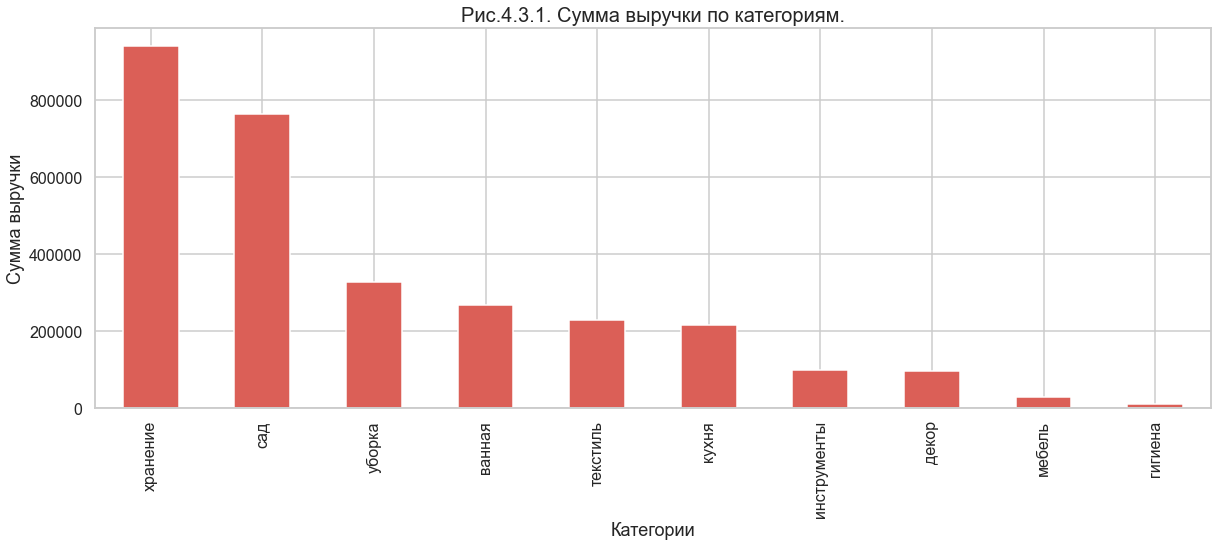

In [55]:
# Построим график по сумме выручки по категориям.
sns.set_style('whitegrid')
sns.set_context('talk')
groupby_category.plot(kind='bar', y=['revenue'], figsize=(20,7), grid=True, 
                      fontsize=16, legend=False)
plt.title('Рис.4.3.1. Сумма выручки по категориям.', fontsize=20)
plt.xlabel('Категории')
plt.ylabel('Cумма выручки')
plt.show()

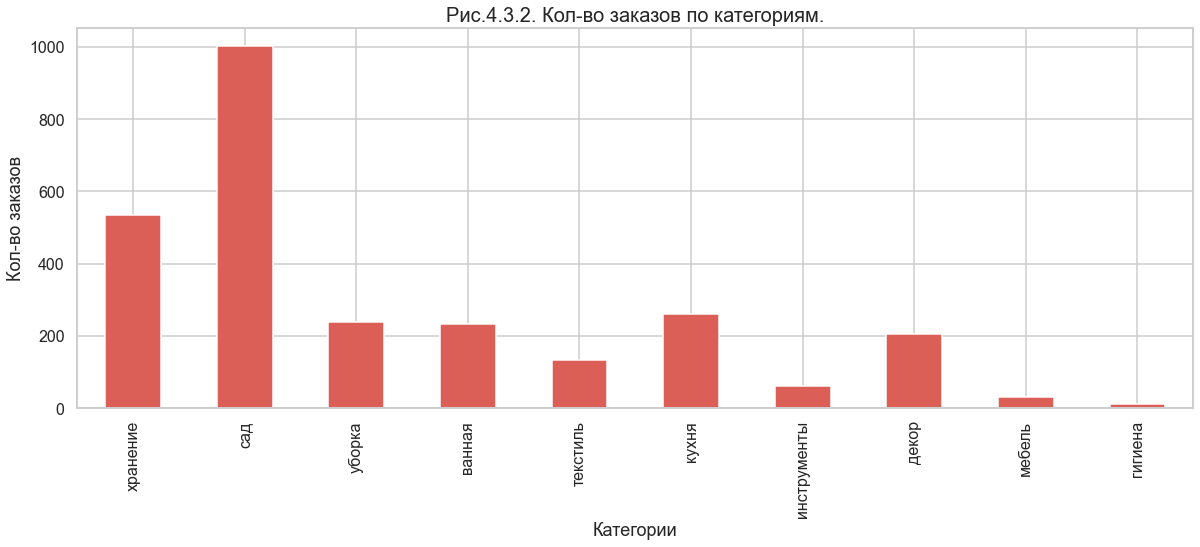

In [56]:
# Построим график по кол-ву заказов по категориям.
sns.set_style('whitegrid')
sns.set_context('talk')
groupby_category.plot(kind='bar', y=['orders'], figsize=(20,7), grid=True, 
                      fontsize=16, legend=False)
plt.title('Рис.4.3.2. Кол-во заказов по категориям.', fontsize=20)
plt.xlabel('Категории')
plt.ylabel('Кол-во заказов')
plt.show()

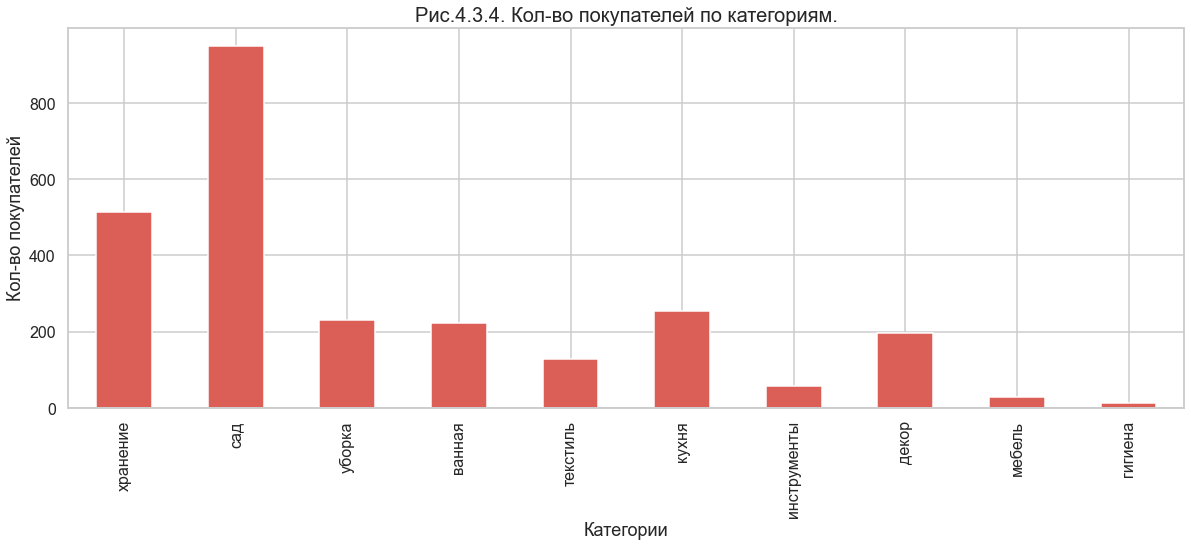

In [57]:
# Построим график по кол-ву покупателей по категориям.
sns.set_style('whitegrid')
sns.set_context('talk')
groupby_category.plot(kind='bar', y=['customers'], figsize=(20,7), grid=True, 
                      fontsize=16, legend=False)
plt.title('Рис.4.3.4. Кол-во покупателей по категориям.', fontsize=20)
plt.xlabel('Категории')
plt.ylabel('Кол-во покупателей')
plt.show()

### Вывод

 - Если смотреть по сумме выручки, самая прибыльная категория — это «хранение», затем идёт категория «сад». Менее прибыльная категория «уборка».
 - Если смотреть по количеству заказов, самые продаваемые товары категории «сад», затем идет категория «хранение», что подтверждает, что основной товарный ассортимент — это категории «сад», а остальные — дополнительные. 
 - Если смотреть по среднему чеку, по показателю эффективности продаж, то категория «сад» как основной ассортимент товара, дает самую малую выручку. Чтобы улучшить данный показатель следует, предлагать клиентам магазина приобрести сопутствующий товар со скидкой. Можно работать с ассортиментом и его сортировкой, предлагая позиции дороже среднего чека. Проводить акции и спецпредложения. 
 - Основной доход интернет- магазина это от категорий «текстиль», «хранение», «инструменты» и «уборка».

### 4.4. Поищем сезонность товаров по категориям. Проанализируем продажи по категориям по временам года. 

In [58]:
# Напишем функцию season, принимающую номер месяца от 1 до 12, 
# и возвращающую время года, которому этот месяц принадлежит (весна, лето, осень или зима).
def season(month):
    if  3 <= month <= 5:
        return 'весна'
    elif 6 <= month <= 8:
        return 'лето'
    elif 9 <= month <= 11:
        return 'осень'
    else:
        return 'зима'

In [59]:
# Cоздадим отдельный столбец с временами года в зависимости от месяца, 
# и в его ячейках записать значения, возвращаемые функцией.
df_clean['season'] = df_clean['month'].apply(season)
display(df_clean.shape)
df_clean.sample(5)

(4523, 16)

,date_x,customer_id,order_id,product,quantity,price,revenue,date,year,month,week,day,hour,weekends,category,season
767,2018-11-11 17:00:00,94fd3491-f37a-4317-b6c0-c544f0d26629,68950,гладильная доска attribute teflonix 130х46 см abt142,1,3749.00,3749.00,2018-11-11,2018,11,45,7,17,1,уборка,осень
251,2018-10-14 17:00:00,552e17df-ba16-4e66-84fb-55a5557a6bea,68643,ложка чайная ripple сталь 25 мм 3 шт attribute acr033,4,142.00,568.00,2018-10-14,2018,10,41,7,17,1,кухня,осень
826,2018-11-16 15:00:00,19583336-1bfd-42de-a86b-a887552c6c99,69026,стремянка металлическая 3 ступени см3 ника,1,899.00,899.00,2018-11-16,2018,11,46,5,15,0,инструменты,осень
338,2018-10-20 16:00:00,34c37064-4bc8-45d7-aec9-de039cb30f63,68702,контейнер для овощей полимербыт 3-х секционный лоток 9 л 4312600,1,674.00,674.00,2018-10-20,2018,10,42,6,16,1,хранение,осень
2419,2019-03-21 14:00:00,036d75ea-b633-41a8-8974-3f84fee8c65e,70822,tepмокружка avex freeflow 700 мл зеленый avex0759,1,2399.00,2399.00,2019-03-21,2019,3,12,4,14,0,кухня,весна


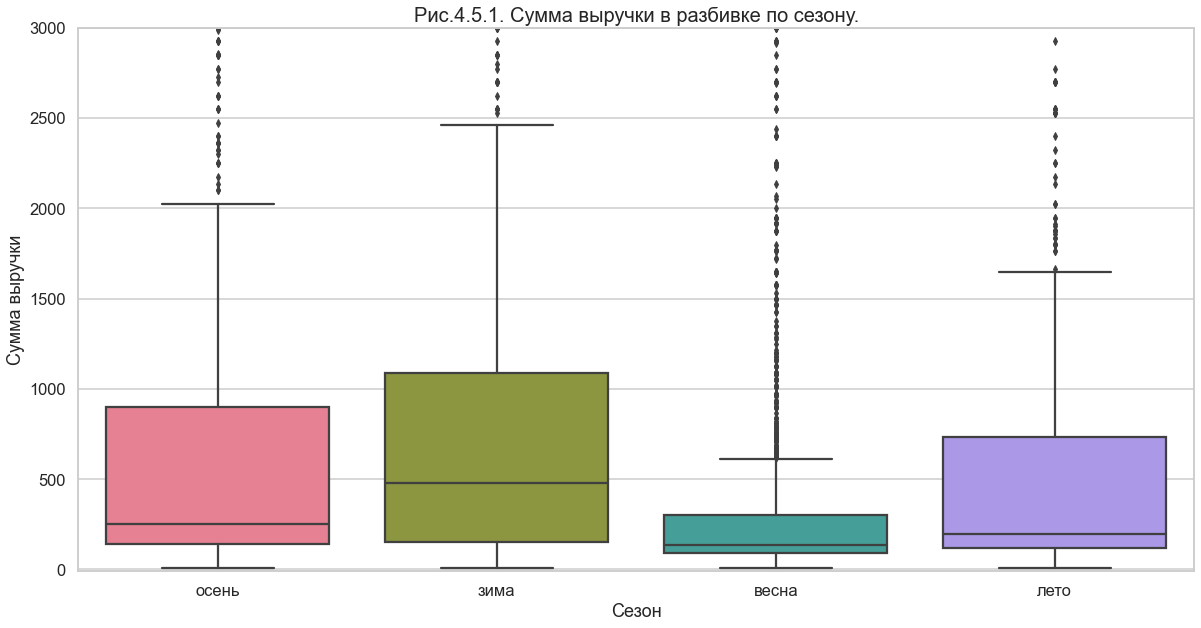

In [60]:
# Построим график boxplot по выручке в разбивке по времени года.
sns.set(rc={'figure.figsize':(20, 10)})
sns.set_style('whitegrid')
sns.set_context('talk')
sns.boxplot(x='season', y='revenue', data=df_clean, palette='husl').set_ylim(-10, 3000)
plt.title('Рис.4.5.1. Сумма выручки в разбивке по сезону.', fontsize=20)
plt.xlabel('Сезон')
plt.ylabel('Сумма выручки')
plt.show()

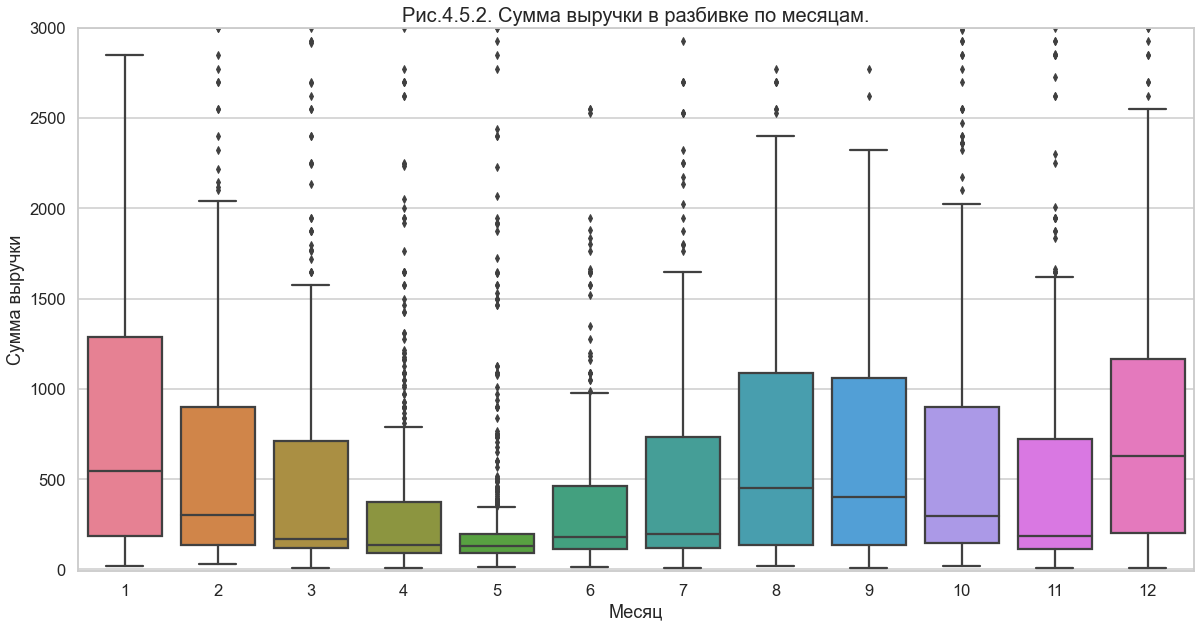

In [61]:
# Построим график boxplot по выручке в разбивке по месяцам.
sns.set(rc={'figure.figsize':(20, 10)})
sns.set_style('whitegrid')  
sns.set_context('talk')
sns.boxplot(x='month', y='revenue', data=df_clean, palette='husl').set_ylim(-10, 3000)
plt.title('Рис.4.5.2. Сумма выручки в разбивке по месяцам.', fontsize=20)
plt.xlabel('Месяц')
plt.ylabel('Сумма выручки')
plt.show()

### Проанализируем продажи по категориям по временам года.

In [62]:
# Создадим датасеты по категориям.
storage_category = df_clean.query('category == "хранение"')
furniture_category = df_clean.query('category == "мебель"')
kitchen_category = df_clean.query('category == "кухня"')
bathroom_category = df_clean.query('category == "ванная"')
textile_category = df_clean.query('category == "текстиль"')
garden_category = df_clean.query('category == "cад"')
cleaning_category = df_clean.query('category == "уборка"')
instruments_category = df_clean.query('category == "инструменты"')
hygiene_category = df_clean.query('category == "гигиена"')
decor_category = df_clean.query('category == "декор"')

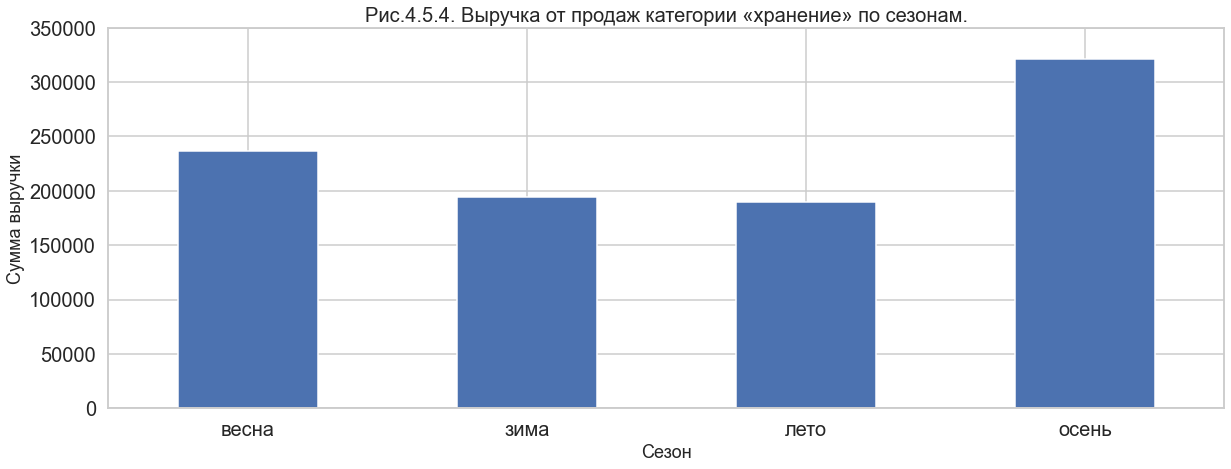

In [63]:
# Выручка от продаж категории «хранение» по сезонам.
storage_category.groupby(['season']).agg({'revenue': 'sum'})\
                .plot(kind='bar', y=['revenue'], figsize=(20,7), grid=True, fontsize=20, legend=False)\
                .set_ylim(-100, 350000)
plt.title('Рис.4.5.4. Выручка от продаж категории «хранение» по сезонам.', fontsize=20)
plt.xlabel('Сезон')
plt.ylabel('Cумма выручки')
plt.xticks(rotation=0)
plt.show()

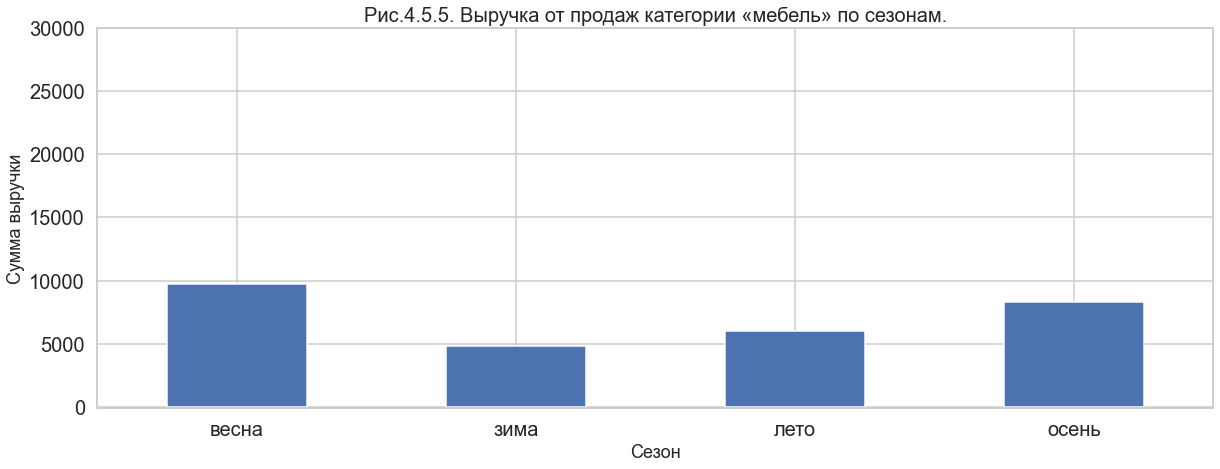

In [64]:
# Выручка от продаж категории «мебель» по сезонам.
furniture_category.groupby(['season']).agg({'revenue': 'sum'})\
                .plot(kind='bar', y=['revenue'], figsize=(20,7), grid=True, fontsize=20, legend=False)\
                .set_ylim(-100, 30000)
plt.title('Рис.4.5.5. Выручка от продаж категории «мебель» по сезонам.', fontsize=20)
plt.xlabel('Сезон')
plt.ylabel('Cумма выручки')
plt.xticks(rotation=0)
plt.show()

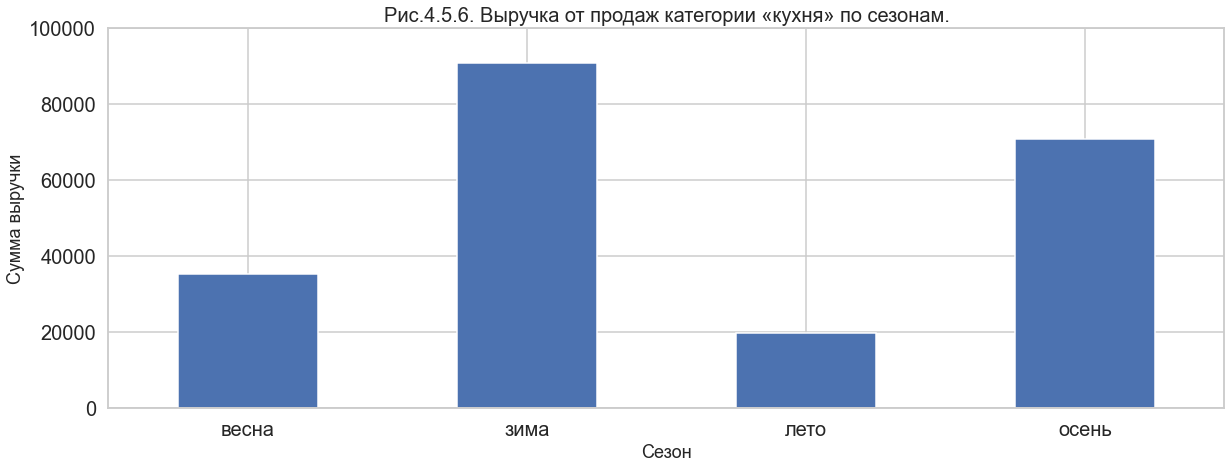

In [65]:
# Выручка от продаж категории «кухня» по сезонам.
kitchen_category.groupby(['season']).agg({'revenue': 'sum'})\
                .plot(kind='bar', y=['revenue'], figsize=(20,7), grid=True, fontsize=20, legend=False)\
                .set_ylim(-100, 100000)
plt.title('Рис.4.5.6. Выручка от продаж категории «кухня» по сезонам.', fontsize=20)
plt.xlabel('Сезон')
plt.ylabel('Cумма выручки')
plt.xticks(rotation=0)
plt.show()

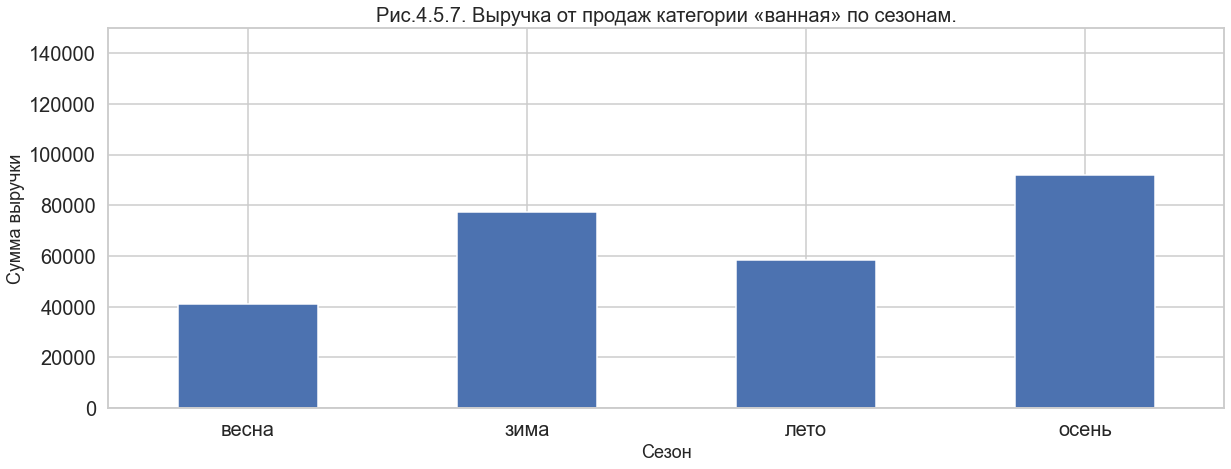

In [66]:
# Выручка от продаж категории «ванная» по сезонам.
bathroom_category.groupby(['season']).agg({'revenue': 'sum'})\
                .plot(kind='bar', y=['revenue'], figsize=(20,7), grid=True, fontsize=20, legend=False)\
                .set_ylim(-100, 150000)
plt.title('Рис.4.5.7. Выручка от продаж категории «ванная» по сезонам.', fontsize=20)
plt.xlabel('Сезон')
plt.ylabel('Cумма выручки')
plt.xticks(rotation=0)
plt.show()

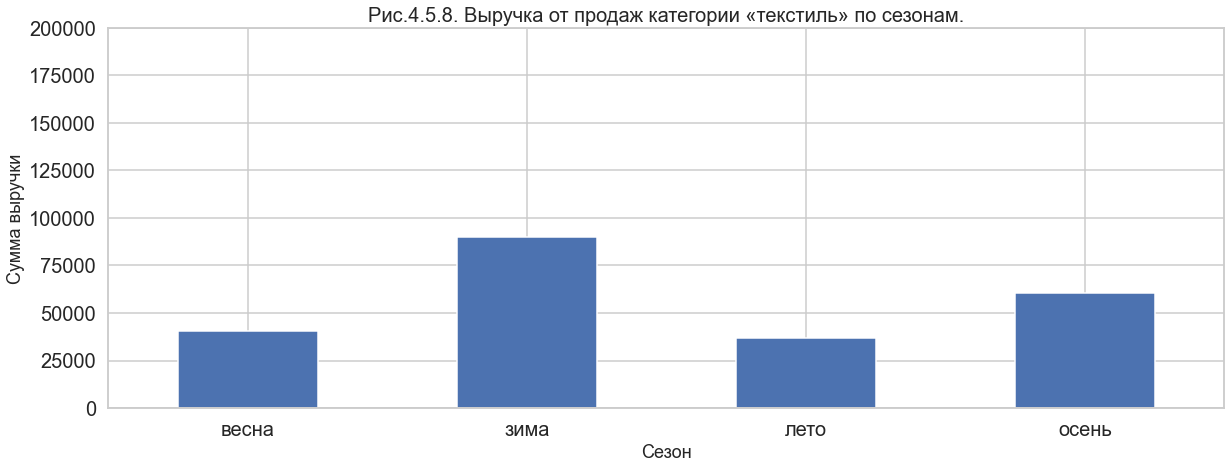

In [67]:
# Выручка от продаж категории «текстиль» по сезонам.
textile_category.groupby(['season']).agg({'revenue': 'sum'})\
                .plot(kind='bar', y=['revenue'], figsize=(20,7), grid=True, fontsize=20, legend=False)\
                .set_ylim(-100, 200000)
plt.title('Рис.4.5.8. Выручка от продаж категории «текстиль» по сезонам.', fontsize=20)
plt.xlabel('Сезон')
plt.ylabel('Cумма выручки')
plt.xticks(rotation=0)
plt.show()

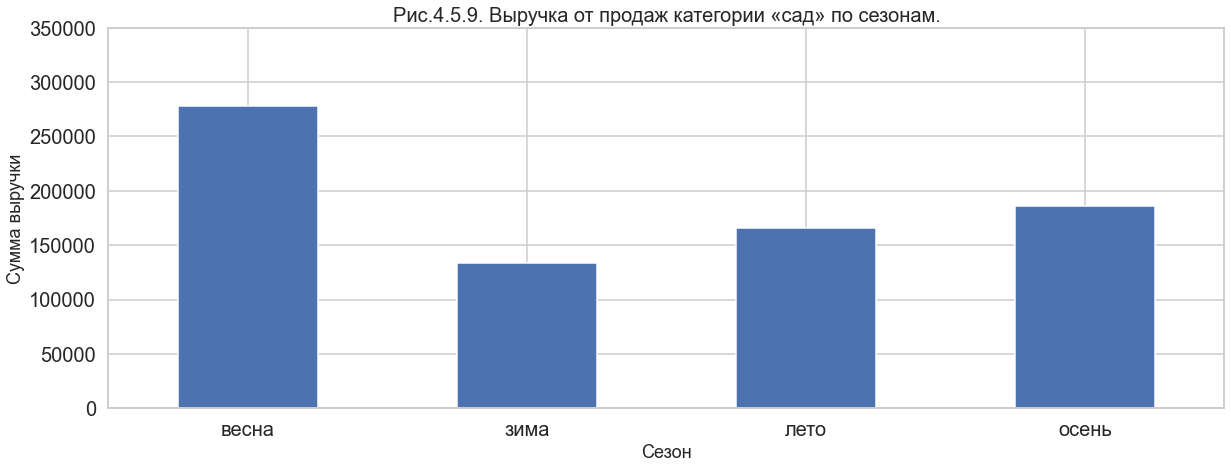

In [68]:
# Выручка от продаж категории «cад» по сезонам.
garden_category.groupby(['season']).agg({'revenue': 'sum'})\
                .plot(kind='bar', y=['revenue'], figsize=(20,7), grid=True, fontsize=20, legend=False)\
                .set_ylim(-100, 350000)
plt.title('Рис.4.5.9. Выручка от продаж категории «cад» по сезонам.', fontsize=20)
plt.xlabel('Сезон')
plt.ylabel('Cумма выручки')
plt.xticks(rotation=0)
plt.show()

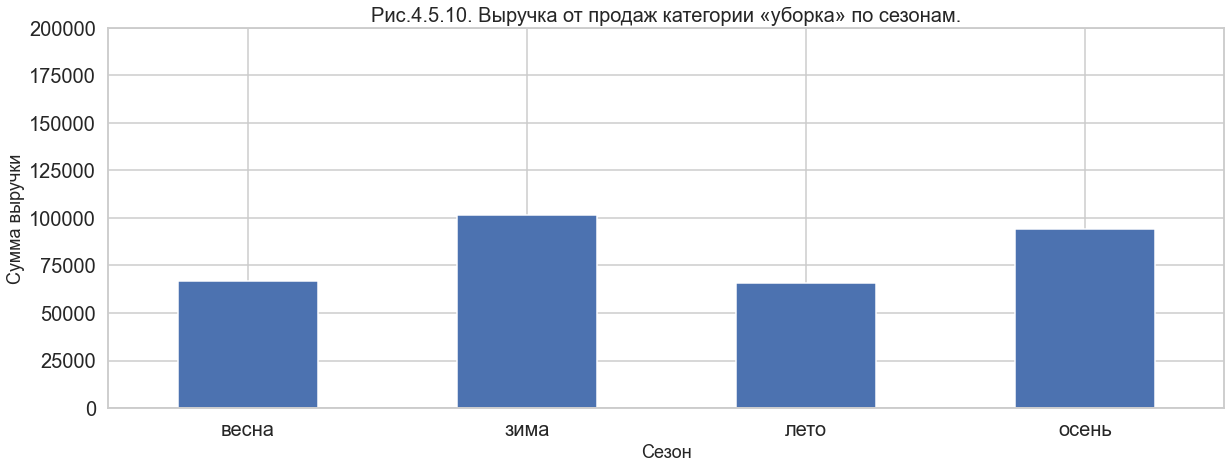

In [69]:
# Выручка от продаж категории «уборка» по сезонам.
cleaning_category.groupby(['season']).agg({'revenue': 'sum'})\
                .plot(kind='bar', y=['revenue'], figsize=(20,7), grid=True, fontsize=20, legend=False)\
                .set_ylim(-100, 200000)
plt.title('Рис.4.5.10. Выручка от продаж категории «уборка» по сезонам.', fontsize=20)
plt.xlabel('Сезон')
plt.ylabel('Cумма выручки')
plt.xticks(rotation=0)
plt.show()

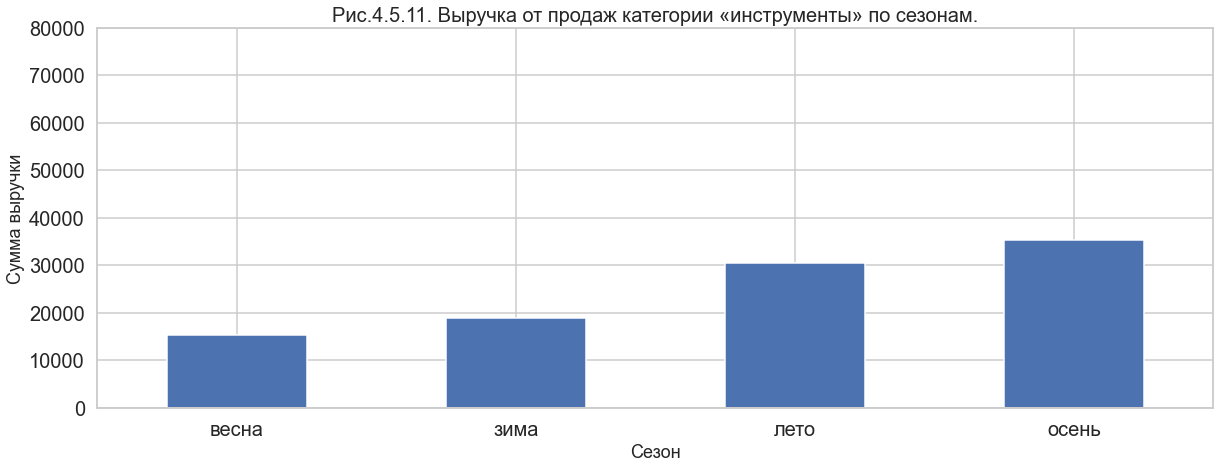

In [70]:
# Выручка от продаж категории «инструменты» по сезонам.
instruments_category.groupby(['season']).agg({'revenue': 'sum'})\
                .plot(kind='bar', y=['revenue'], figsize=(20,7), grid=True, fontsize=20, legend=False)\
                .set_ylim(-100, 80000)
plt.title('Рис.4.5.11. Выручка от продаж категории «инструменты» по сезонам.', fontsize=20)
plt.xlabel('Сезон')
plt.ylabel('Cумма выручки')
plt.xticks(rotation=0)
plt.show()

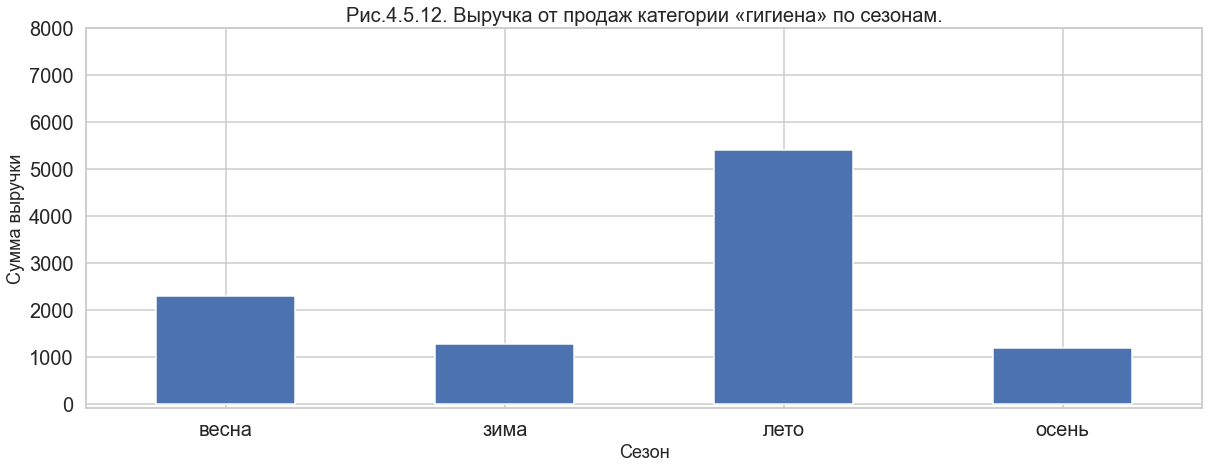

In [71]:
# Выручка от продаж категории «гигиена» по сезонам.
hygiene_category.groupby(['season']).agg({'revenue': 'sum'})\
                .plot(kind='bar', y=['revenue'], figsize=(20,7), grid=True, fontsize=20, legend=False)\
                .set_ylim(-100, 8000)
plt.title('Рис.4.5.12. Выручка от продаж категории «гигиена» по сезонам.', fontsize=20)
plt.xlabel('Сезон')
plt.ylabel('Cумма выручки')
plt.xticks(rotation=0)
plt.show()

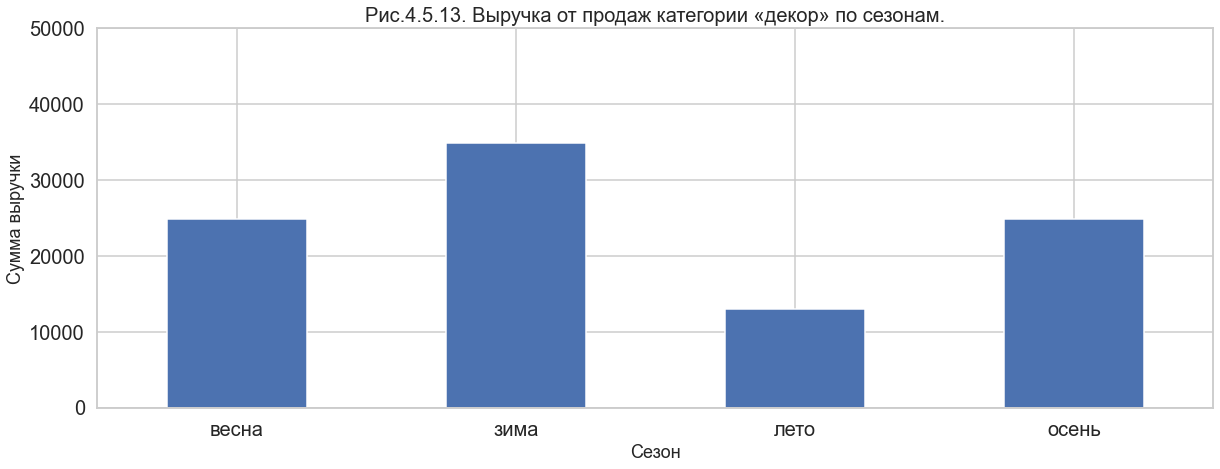

In [72]:
# Выручка от продаж категории «декор» по сезонам.
decor_category.groupby(['season']).agg({'revenue': 'sum'})\
                .plot(kind='bar', y=['revenue'], figsize=(20,7), grid=True, fontsize=20, legend=False)\
                .set_ylim(-100, 50000)
plt.title('Рис.4.5.13. Выручка от продаж категории «декор» по сезонам.', fontsize=20)
plt.xlabel('Сезон')
plt.ylabel('Cумма выручки')
plt.xticks(rotation=0)
plt.show()

### Вывод

Сумма выручки в разбивке по сезону, показала, что, самый прибыльный период — это осенне-зимний. То есть, наибольшие объемы продаж приходятся на III и IV квартал года. Самые низкие доходы в весенний сезон, в месяц май. В разбивке по месяцам, это более наглядно. Относительно 2018 и 2019 гг, также видно снижение объемов продаж.

Проанализировав продажи по категориям по временам года, наблюдается следующее разделение на периоды по доходам с категорий:
     - Период осенне-зимний, прибыльный по категориям «кухня», «ванная», «уборка», «инструменты», «декор».    
     - Период весенне-летний, прибыльный по категориям ««гигиена», что логично.
     - Период весна и осень, прибыльный по категориям «сад», «хранение», «мебель», «текстиль».

## Шаг 5. Сегментация покупателей на основе истории их покупок

Для сегментации покупателей, необходимо провести кластеризацию. Кластеризация поможет выделить покупателей и предложить каждому сегменту подходящий вариант продукта и точную коммуникацию. Для этого необходимо рассчитать матрицу расстояний между всеми признаками с помощью класса linkage.

### 5.1. Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуйте дендрограмму.

In [73]:
# Проведем кластеризацию. Оставим только количественным данные.
clusters_data = df_clean.pivot_table(index = 'product', aggfunc = {'order_id': 'nunique', 'quantity': 'sum', 
                                                      'price': 'mean', 'weekends': 'sum'})
#clusters_data.columns = ['orders', 'quantity', 'price', 'weekdays', 'weekends'] # переименуем столбцы 
clusters_data.sample(10)

,order_id,price,quantity,weekends
product,,,,
цветок искусственный гортензия 58 см цвет в ассортименте,1,59.00,6,0
тимьян d-9 см,4,116.00,22,1
набор стаканов ежевика 3 шт 300 мл дсг424020311,1,194.00,1,1
роза садовая чайногибридная в горшке лимбо,2,187.50,2,0
гладильная доска белль-юниор1 345х112см дсп 1200006,1,899.00,1,0
сушилка для белья потолочно-настенная gimi lift 240 5031,3,2061.67,3,0
скатерть dasch донна роза из пвх 0401-2 розы овальная 122х152 см 5953,1,389.00,1,1
стакан для ванной комнаты darwin hammered керамика 11х8 см черный spirella 1015330,2,412.00,2,1
сушилка для белья потолочная лиана люкс 140 лдн-т,1,449.00,1,0


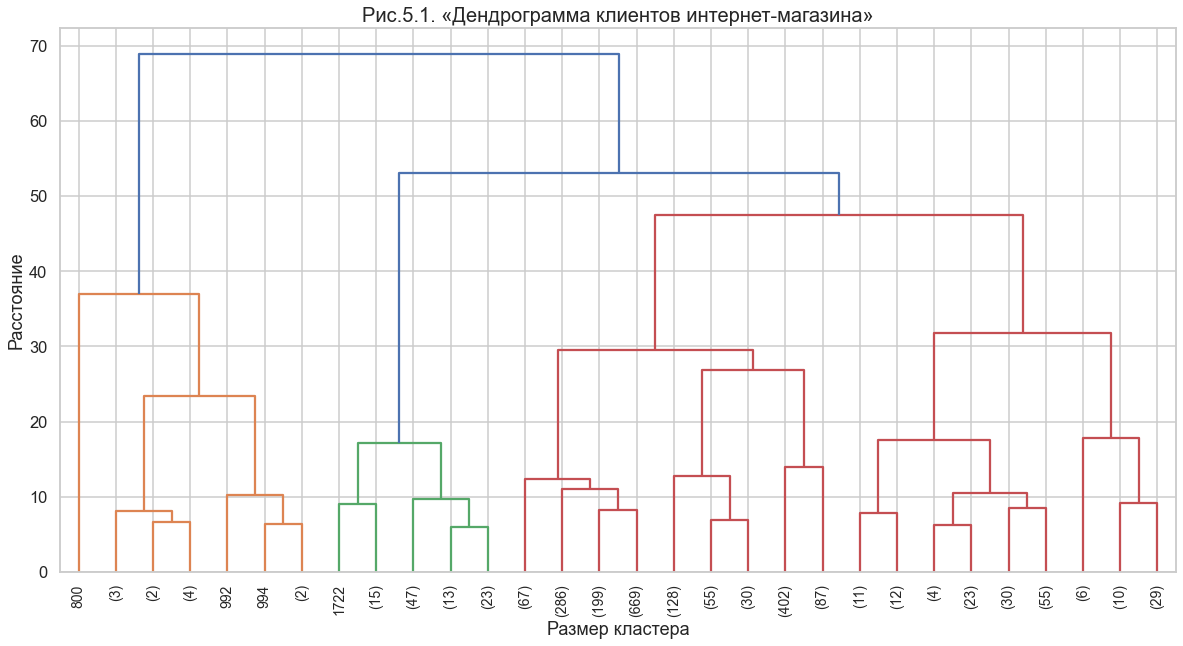

In [74]:
# Стандартизируем данные. Создим объект класса Scaler.
scaler = StandardScaler()

# Обучим нормализатор и преобразуем набор данных. Без целевой переменной.
X_st = scaler.fit_transform(clusters_data)

# Расчитаем матрицу расстояний с помощью метода linkage.
linked = linkage(X_st, method = 'ward')

# Построим график дендрограмма.
plt.figure(figsize=(20, 10)) 
dendrogram(linked, orientation='top', show_leaf_counts=True, truncate_mode='lastp', p=30, leaf_rotation=90, 
           leaf_font_size=14)
plt.title("Рис.5.1. «Дендрограмма клиентов интернет-магазина»", fontsize=20)
plt.xlabel("Размер кластера")
plt.ylabel("Расстояние")
plt.show()

### Вывод

Предложенное оптимальное `число кластеров 2`.

### 5.2. Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем сегменты покупателей.

Алгоритм K-Means группирует пошагово все объекты. Вот принцип его работы: 
 - Есть K кластеров. Алгоритм пошагово подбирает их центры и относит объекты к тому кластеру, чей центр ближе. 
 - Центры корректируются (меняют своё положение) до тех пор, пока это позволяет минимизировать среднее расстояние от объектов каждого кластера до его центра. 
 - Когда расстояние от объектов до центра перестаёт снижаться или сокращается несущественно, алгоритм останавливается и фиксирует разбиение, считая его оптимальным. 

In [75]:
# Кластеризация методом k-средни.
# задаём модель k_means с числом кластеров n=2
k_means = KMeans(n_clusters = 2, random_state=1)

# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 1)
labels = k_means.fit_predict(X_st)

# присваиваю каждому наблюдению в датафрейме соответствующее значение кластера 
clusters_data['cluster_km'] = labels
clusters_data 

,order_id,price,quantity,weekends,cluster_km
product,,,,,
tepмокружка avex freeflow 700 мл зеленый avex0759,1,2399.00,1,0,0
tepмокружка avex freeflow 700 мл сталь avex0776,1,2399.00,1,0,0
tepмокружка avex recharge 500 мл голубой avex0681,2,2099.00,2,0,0
автоматическая щетка leifheit для мытья окон с ручкой 43 см. 51114,1,7229.00,1,1,0
агератум рассада однолетних цветов в кассете по 10 шт,1,210.00,2,0,0
...,...,...,...,...,...
ясколка войлочная белая объем 05 л,3,97.00,3,0,0
ящик для хранения textilebox curver 57 л 34x20x13 см прозрачный 03003-001-00,1,224.00,3,0,0
ящик для хранения фимако люкс плетеный с крышкой m бежевый,1,749.00,2,1,0


### Вывод

Кластеризация по алгоритму K-Means выполнена.

### 5.3. Посмотрим на статистику по сегментам покупателей.

In [76]:
# Найдём выручку и средний чек покупателя avg_check — разделим показатель revenue на orders.
clusters_data['revenue'] = clusters_data['quantity'] * clusters_data['price']
clusters_data['avg_check'] = clusters_data['revenue'] / clusters_data['order_id']
# Выводим статистику по кластерам.
display(clusters_data.groupby(['cluster_km']).mean().T)

cluster_km,0,1
order_id,1.71,17.74
price,642.54,149.36
quantity,3.35,46.72
weekends,0.39,4.28
revenue,1268.64,5433.56
avg_check,858.90,404.51


### Вывод

**Кластер 0**
 - Среднее количество заказов 2.
 - Среднее количество товара 3 товара.
 - Средняя суммарная выручкb 1270 д.е.
 - Средний чек заказа 860 д.е.

**Кластер 1**
 - Среднее количество заказов 18 заказов.
 - Среднее количество товара 47 товара.
 - Средняя суммарная выручка 5434 д.е.
 - Средний чек заказа 404 д.е.

По результатам видим, что профили покупателей очень различаются. Скорей всего кластер 1 – это  оптовики, они покупают один раз с большим количеством товара, поэтому и средний чек больше. Кластер 0, это обычные покупатели, которые совершают покупки несколько раз на протяжении недели с небольшим количеством товара. У кластера 0 объём продаж больше. На них и нужно ориентироваться. 

## Шаг 6. Проверка статистических гипотез

### 6.1. Посчитаем статистическую значимость различий в среднем чеке заказа между сегментами покупателей. 

Гипотеза №1.

Сформулируем нулевую и альтернативную гипотезы:
 - **Нулевая гипотеза H₀**: Нет статистически значимых различий в среднем чеке между сегментами покупателей.
 - **Альтернативная гипотеза H₁**: Есть статистически значимое различие в среднем чеке между между сегментами покупателей.

In [77]:
# Генерируем две независимые выборки. 
cluster0 = clusters_data[clusters_data['cluster_km']==0]['avg_check']
cluster1 = clusters_data[clusters_data['cluster_km']==1]['avg_check']

**Найдем соотношение дисперсий, и в случае различия более чем на 5 %, принять, что дисперсии не равны.**

In [78]:
# Оценим дисперсию по выборке cluster0 и cluster1.
print(f"Дисперсия 0-го кластера: {np.var(cluster0, ddof=1)} ")
print(f"Дисперсия 1-го кластера: {np.var(cluster1, ddof=1)} ")
print(f"Соотношение дисперсий: {(np.var(cluster1, ddof=1))/(np.var(cluster0, ddof=1))} ")

Дисперсия 0-го кластера: 2587474.399057188 
Дисперсия 1-го кластера: 254083.31672868994 
Соотношение дисперсий: 0.09819742248320279 


In [79]:
# Выполним проверку гипотезы.
alpha = 0.05 # критический уровень статистической значимости 
results = stats.mannwhitneyu(cluster0, cluster1) #alternative='two-sided'

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.2567860510668126
Не получилось отвергнуть нулевую гипотезу


In [80]:
print("Медиана 0-го кластера: {} ".format(int(np.median(cluster0))))
print("Медиана 1-го кластера: {} ".format(int(np.median(cluster1))))

Медиана 0-го кластера: 299 
Медиана 1-го кластера: 195 


### Вывод

P-value = 0,25 значительно больше 0,05. Значит, нет причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия. То есть, нет статистически значимого различия в среднем чеке между между сегментами покупателей.

### 6.2. Посчитаем статистическую значимость различий в среднем объёме продаж между сегментами покупателей.

Гипотеза №2.

Сформулируем нулевую и альтернативную гипотезы:
 - **Нулевая гипотеза H₀**: Нет статистически значимых различий в среднем объёме продаж между сегментами покупателей.
 - **Альтернативная гипотеза H₁**: Есть статистически значимое различие в среднем объёме продаж между сегментами покупателей.

In [81]:
# Генерируем две независимые выборки.
sales_volume_cluster0 = clusters_data[clusters_data['cluster_km']==0]['revenue']
sales_volume_cluster1 = clusters_data[clusters_data['cluster_km']==1]['revenue']

In [82]:
# Оценим дисперсию по выборке sales_volume_cluster0 и sales_volume_cluster1.
print(f"Дисперсия 0-го кластера: {np.var(sales_volume_cluster0, ddof=1)} ")
print(f"Дисперсия 1-го кластера: {np.var(sales_volume_cluster1, ddof=1)} ")
print(f"Соотношение дисперсий: {np.var(sales_volume_cluster1, ddof=1)/(np.var(sales_volume_cluster0, ddof=1))} ")

Дисперсия 0-го кластера: 6148719.068159006 
Дисперсия 1-го кластера: 54454392.008124605 
Соотношение дисперсий: 8.85621727135256 


In [83]:
# Выполним проверку гипотезы.
alpha = 0.05 # критический уровень статистической значимости 
results = stats.mannwhitneyu(sales_volume_cluster0, sales_volume_cluster1) 

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 5.308830411579729e-18
Отвергаем нулевую гипотезу


In [84]:
print("Медиана 0-го кластера: {} ".format(int(np.median(sales_volume_cluster0))))
print("Медиана 1-го кластера: {} ".format(int(np.median(sales_volume_cluster1))))

Медиана 0-го кластера: 456 
Медиана 1-го кластера: 3720 


### Вывод

P-value значительно меньше 0,05, это говорит о том, что есть статистически значимое различие в среднем объёме продаж между сегментами покупателей.

### 6.3. Проверим одинаковые средние объёмы продаж в будни и выходные или нет.

Гипотеза №3.

Сформулируем нулевую и альтернативную гипотезы:
 - **Нулевая гипотеза H₀**: Средние объёмы продаж в будни и выходные одинаковые.
 - **Альтернативная гипотеза H₁**: Средние объёмы продаж в будни и выходные разные.

In [85]:
# Генерируем две независимые выборки.
sales_volume_weekdays = df_clean[df_clean['weekends']==0]['revenue']
sales_volume_weekends = df_clean[df_clean['weekends']==1]['revenue']

In [86]:
# Оценим дисперсию по выборке sales_volume_weekdays и sales_volume_weekends.
print(f"Дисперсия объём продаж в будни: {np.var(sales_volume_weekdays, ddof=1)} ")
print(f"Дисперсия объём продаж в выходные: {np.var(sales_volume_weekends, ddof=1)} ")
print(f"Соотношение дисперсий: {np.var(sales_volume_weekdays, ddof=1)/(np.var(sales_volume_weekends, ddof=1))}")

Дисперсия объём продаж в будни: 2244842.6308827987 
Дисперсия объём продаж в выходные: 890956.8402812808 
Соотношение дисперсий: 2.519586280042575


In [87]:
print("Стандартное отклонение объём продаж в будни: {} ".format(np.std(sales_volume_weekdays, ddof=1)))
print("Стандартное отклонение объём продаж в выходные: {} ".format(np.std(sales_volume_weekends, ddof=1)))

Стандартное отклонение объём продаж в будни: 1498.2798907022675 
Стандартное отклонение объём продаж в выходные: 943.9051013111863 


In [88]:
# Выполним проверку гипотезы. Будем использовать метод ttest_ind.
alpha = 0.05

results = st.ttest_ind(sales_volume_weekdays, sales_volume_weekends) #equal_var = False

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0651849881963734
Не получилось отвергнуть нулевую гипотезу


In [89]:
print("Cреднее значение объём продаж в будни: {} ".format(int(np.mean(sales_volume_weekdays))))
print("Cреднее значение объём продаж в выходные: {} ".format(int(np.mean(sales_volume_weekends))))

Cреднее значение объём продаж в будни: 680 
Cреднее значение объём продаж в выходные: 589 


### Вывод

Исходя из теста мы видим, что средние объёмы продаж в будни и выходные одинаковые. Не получилось отвергнуть нулевую гипотезу.

## Шаг 7. Общие выводы и рекомендации

Подводя итоги, имеющиеся факты:

**ПО РЕЗУЛЬТАТАМ ИССЛЕДОВАТЕЛЬСКОГО АНАЛИЗА ДАННЫХ:**

Данными которыми располагаем: с 2018-10-01 по 2019-10-31, один год и один месяц. 

Рост активности покупателей виден с декабря 2018 по февраль 2019. Заметно снижение активности с апреля до конца июня 2019 года. В июле 2019 виден небольшой рост по кол-ву уникальных покупателей. Активность покупателей больше всего проявляется в конце и начале года.

**Заказы**
 - Большинство заказов совершаются в первой половине дня с 8 до 18. Пик приходится на 11 часов. Меньше всего клиенты заказываю ночью.
 - С воскресенья виден рост по совершению заказов. Пик приходится на вторник, с наибольшим кол-во заказов. Потом видим снижение, меньше всего заказывают в субботу.
 - В апреле и феврале 2019 было сделано больше всего заказов, это связано с активностью клиентов. То есть, количество совершивших заказов, зависит от активности покупателей.

**Выручка**
 - День недели вторник в 13:00 дня самый продуктивный, приносит больше всего выручки.
 - **`В течение всего периода 2018-2019 г.г. наблюдается негативная динамика суммарной выручки от продаж.`** Общая сумма выручки в конце 2019 г. сократилась почти в 1,5 раза, относительно прошлого года. Возможно причиной могло послужить общее ухудшение  условий предпринимательской деятельности.
 - Темп роста продаж = (выручка текущего периода / выручка прошлого периода) * 100 = (170429 / 243892) * 100 = 69,87%. Так, в 2019 году темп роста продаж интернет-магазина составил 69,87% по сравнению с 2018 годом. Мы видим, что `динамика продаж отрицательная.`
 - `Снижение доходов с продаж также видно по среднему чеку покупателя`. 

**ПО РЕЗУЛЬТАТАМ АНАЛИЗА ТОВАРНОГО АССОРТИМЕНТА**

**Самые продаваемые товары в каждой категории по кол-ву заказов за весь период:**
 - В категории «cад» самый продаваемый товар: пеларгония розебудная red pandora
 - В категории «хранение» самый продаваемый товар: сумка-тележка 2-х колесная gimi argo синяя
 - В категории «уборка» самый продаваемый товар: таз пластмассовый со стиральной доской
 - В категории «декор» самый продаваемый товар: муляж персики мини полиуретан
 - В категории «текстиль» самый продаваемый товар: подкладка под чехол zalger
 - В категории «ванная» самый продаваемый товар: корыто, оцинкованное 45 л бесшовное
 - В категории «кухня» самый продаваемый товар: кувшин пластмассовый с крышкой "кумган" 20 л
 - В категории «мебель» самый продаваемый товар: карниз для ванной комнаты виолет раздвижной
 - В категории «инструменты» самый продаваемый товар: стяжка оконная с болтом ст-55 цинк 1
 - В категории «гигиена» самый продаваемый товар: паста зубная для профилактики заболеваний десен kobayashi японский кипарис

**Самые прибыльные товары в каждой категории за весь период:**
 - В категории «текстиль» самый прибыльный товар: простынь вафельная 200х180 см wellness
 - В категории «хранение» самый прибыльный товар: сумка-тележка 2-х колесная gimi
 - В категории «уборка» самый прибыльный товар: гладильная доска ника blues
 - В категории «ванная» самый прибыльный товар: коврик придверный attribute nature кокосовый
 - В категории «cад» самый прибыльный товар: пеларгония розебудная red pandora
 - В категории «инструменты» самый прибыльный товар: стремянка colombo factotum 4 ступени алюминий
 - В категории «кухня» самый прибыльный товар: модульная стеклянная банка
 - В категории «гигиена» самый прибыльный товар: паста зубная для профилактики заболеваний десен kobayashi японский кипарис
 - В категории «мебель» самый прибыльный товар: карниз для ванной комнаты виолет раздвижной
 - В категории «декор» самый прибыльный товар: ткань универсальная из микрофибры micro magic серая

**Посчитали выручку и количество покупателей по категориям.**
 - Если смотреть `по сумме выручки`, самая прибыльная категория — это «хранение», затем идёт категория «сад». Менее прибыльная категория «гигиена».
 - Если смотреть `по количеству заказов`, самые продаваемые товары категории «сад», затем идет категория «хранение», что подтверждает, что основной товарный ассортимент — это категории «сад», а остальные — дополнительные.
 - Если смотреть `по среднему чеку`, по показателю эффективности продаж, то категория «сад» как основной ассортимент товара, дает маленькую выручку. 
 - `Основной доход интернет- магазина `это от категорий «текстиль», «хранение», «инструменты» и «уборка», то есть, от дополнительного ассортимента. 

**Проанализировали продажи по категориям по временам года.**
 - Сумма выручки в разбивке по сезону, показала, что, `самый прибыльный период — это осенне-зимний.` То есть, наибольшие объемы продаж приходятся на III и IV квартал года. `Самые низкие доходы в весенний сезон, в месяц май.` В разбивке по месяцам, это более наглядно. `Относительно 2018 и 2019 гг, также видно снижение объемов продаж.`

**Проанализировав продажи по категориям по сезонам, наблюдается следующее разделение на периоды по доходам с категорий:**
 - Период осенне-зимний, прибыльный по категориям «кухня», «ванная», «уборка», «инструменты», «декор».    
 - Период весенне-летний, прибыльный по категориям ««гигиена», что логично.
 - Период весна и осень, прибыльный по категориям «сад», «хранение», «мебель», «текстиль».

**ПО РЕЗУЛЬТАТАМ СЕГМЕНТАЦИИ ПОКУПАТЕЛЕЙ:**

По результатам видим, что профили покупателей очень различаются. Скорей всего кластер 1 – это  оптовики, они покупают один раз с большим количеством товара, поэтому и средний чек больше. Кластер 0, это обычные покупатели, которые совершают покупки несколько раз на протяжении недели с небольшим количеством товара. У кластера 0 объём продаж больше. На них и нужно ориентироваться. 

**ПО РЕЗУЛЬТАТАМ ГИПОТЕЗ:**
 - Средние объёмы продаж между сегментами покупателей разные.
 - Средние объёмы продаж в будни и выходные одинаковые.


**РЕКОМЕНДАЦИИ:**
 - **Улучшить средний чек категории «сад» как основной ассортимент товара.** Для этого необходимо, предлагать клиентам магазина приобрести сопутствующий товар со скидкой. Можно работать с ассортиментом и его сортировкой, предлагая позиции дороже среднего чека. Проводить акции и спецпредложения.

 - **Увеличить объёмы продаж.** Поискать причину снижения доходов, для этого необходимо посмотреть на факторы, которые влияют на продажи. Факторы, могут быть следующими: 
     - общии условия предпринимательской деятельности, руководство, персонал;
     - каналы сбыта товара;
     - сезонная динамика продаж, товарный ассортимент. Учитывать, что, период осенне-зимний, прибыльный по категориям «кухня», «ванная», «уборка», «инструменты», «декор». Период весенне-летний, прибыльный по категориям ««гигиена». Период весна и осень, прибыльный по категориям «сад», «хранение», «мебель», «текстиль»;
     - количество покупателей ;
     - конкуренты;
     - общая динамика рынка.
 - **В зависимости от сезона, создавать актуальные рекомендательные предложения внутри товарной категории.**
 - **Также, у покупателей необходимо формировать привычку заходить в интернет-магазин почаще.**

Источники: 
 - «ЯНДЕКС.ПРАКТИКУМ»; 
 - «Python Data Analysis» Third Edition — BIRMINGHAM — MUMBAI.: Packt Publishing. ISBN 978-1-78995-524-8;
 - «Python для сложных задач: наука о данных и машинное обучение» — СПб.: Питер, 2018. — 576 с.: ил. — (Серия «Бестселлеры O’Reilly»). ISBN 978-5-496-03068-7.
 - Devpractice Team. Python. Визуализация данных. Matplotlib. Seaborn. Mayavi. - devpractice.ru. 2020. - 412 с.